In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm
from sklearn.linear_model import LinearRegression
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.svm import SVR
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
#import torch
import pytorch_lightning as pl
import torch.nn as nn
import torch
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib


In [2]:
warnings.filterwarnings("ignore")

In [3]:
The_df = pd.read_csv("The_data.csv", encoding='latin1')

In [5]:
august_data['FT_UL.Interference'].unique()

array([-116.75  , -116.6667, -117.375 , -117.7083, -115.5417, -110.9167,
       -113.9167, -113.125 , -115.8333, -113.7083, -114.3333, -116.5   ,
       -115.6667, -114.7917, -116.1667, -111.7083, -114.7083, -111.8333,
       -113.1667, -114.75  , -112.9167, -114.0833, -116.7083, -115.125 ,
       -117.875 , -116.3333, -116.125 , -114.5417, -112.5833, -115.25  ,
       -112.0833, -113.0833, -115.7917, -114.9583, -114.625 , -113.3333,
       -113.5   , -111.0833, -111.875 , -110.2083, -115.3333, -102.0417,
       -115.0417, -115.4167, -115.75  , -115.9583, -114.125 , -115.1667,
       -115.5833, -113.5417, -114.5833, -114.    , -115.875 , -114.9167,
       -114.4583, -116.5833, -116.0417, -114.6667, -116.    , -114.4167,
       -111.75  , -117.    , -113.75  , -112.7083, -116.875 , -114.2917,
       -116.8333, -116.5417, -117.625 , -112.1667, -111.4583, -113.7917,
       -114.375 , -115.2083, -113.0417, -114.1667, -115.4583, -115.375 ,
       -115.625 , -118.25  , -116.9167, -116.625 , 

In [4]:
pd.set_option('display.max_columns', None)
The_df


,Date,eNodeB Name,Cell Name,LocalCell Id,Integrity,CALL SETUP SUCCESS RATE,AVERAGE REPORTED CQI,DL TRAFFIC VOLUME (GBYTES),RADIO DL DELAY(ms),Avg DL USER THRPUT without Last TTI(ALL) (KBPS)(kbit/s),Avg NB OF USERS (UEs RRC CONNECTED),FT_UL.Interference,DROP CALL RATE,Cities,Temperature (Â°C),Wind Speed (mph),Wind Gust (mph),Humidity (%),Dew Point (Â°C),Pressure (in),Wind,Condition
0,2024-04-01,ARI_0092_TD,ARI_0092_C03_M32_g2,52,1.0,99.9045,11.0470,190.1725,32.3158,19945.3598,17.5180,-115.0000,0.0162,Ariana,19.328165,14.372093,2.232558,48.387755,8.265306,29.907297,WNW,Fair
1,2024-04-01,ARI_0092_TD,ARI_0092_C03_M32_g3,53,1.0,99.9488,11.7238,230.4144,21.9733,22152.7337,20.7634,-115.7083,0.0533,Ariana,19.328165,14.372093,2.232558,48.387755,8.265306,29.907297,WNW,Fair
2,2024-04-01,ARI_0095_TD,ARI_0095_C01_310_g3,53,1.0,100.0000,8.5988,12.4833,66.3829,11158.9535,2.9341,-116.6250,0.0518,Ariana,19.328165,14.372093,2.232558,48.387755,8.265306,29.907297,WNW,Fair
3,2024-04-01,ARI_0095_TD,ARI_0095_C01_310_g2,52,1.0,100.0000,10.7028,141.6939,57.5476,18296.1196,6.3622,-116.2500,0.0224,Ariana,19.328165,14.372093,2.232558,48.387755,8.265306,29.907297,WNW,Fair
4,2024-04-01,ARI_0095_TD,ARI_0095_C01_310_g1,51,1.0,99.9939,8.2787,42.6244,80.7145,10065.2146,5.4516,-116.3333,0.0244,Ariana,19.328165,14.372093,2.232558,48.387755,8.265306,29.907297,WNW,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164199,2023-08-31,MON_0020_TC,MON_0020_C02_409_k2,55,1.0,99.1171,13.6778,31.0870,6.2727,50392.6875,3.2728,-117.3333,1.3154,Monastir,26.641414,10.386364,0.000000,78.320000,22.288889,29.975000,NE,Partly Cloudy
164200,2023-08-31,MON_0020_TC,MON_0020_C02_409_k1,54,1.0,99.9913,12.2675,57.0134,10.0946,40759.8539,5.6941,-117.7500,0.0087,Monastir,26.641414,10.386364,0.000000,78.320000,22.288889,29.975000,NE,Partly Cloudy
164201,2023-08-31,MON_0020_TC,MON_0020_C02_409_g3,53,1.0,99.8706,13.6603,56.9413,5.7167,50175.7305,4.2906,-119.0000,0.0118,Monastir,26.641414,10.386364,0.000000,78.320000,22.288889,29.975000,NE,Partly Cloudy
164202,2023-08-31,MON_0020_TC,MON_0020_C02_409_g2,52,1.0,99.9439,14.0892,55.5344,8.7149,45524.3042,2.9719,-117.9583,0.0093,Monastir,26.641414,10.386364,0.000000,78.320000,22.288889,29.975000,NE,Partly Cloudy


# <span style="color: red;">Visual Analysis between Interference and temperature </span>


# Subplots 

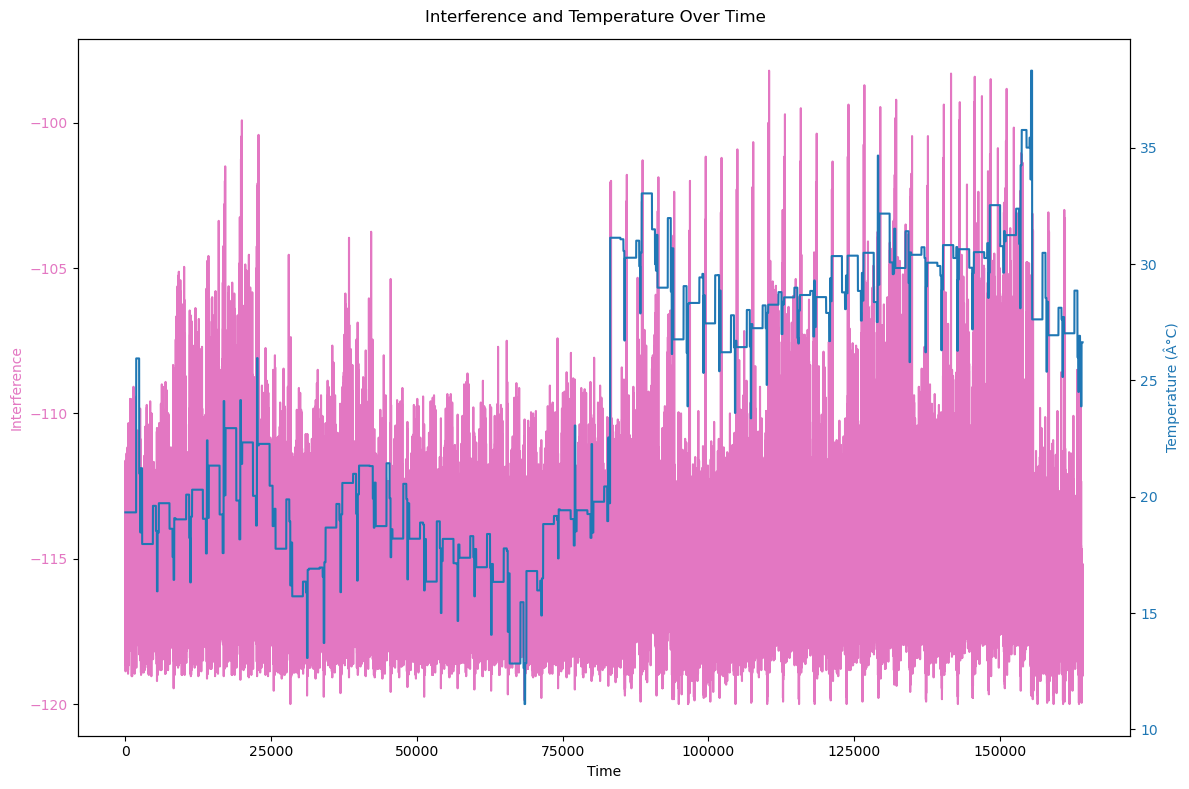

In [19]:
#with Twin Axes
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.set_xlabel('Time')
ax1.set_ylabel('Interference', color='tab:pink')
ax1.plot(The_df.index, The_df['FT_UL.Interference'], color='tab:pink', label='FT_UL.Interference')
ax1.tick_params(axis='y', labelcolor='tab:pink')

ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (Â°C)', color='tab:blue')
ax2.plot(The_df.index, The_df['Temperature (Â°C)'], color='tab:blue', label='Temperature (Â°C)')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.suptitle('Interference and Temperature Over Time')
fig.tight_layout()
plt.show()


<span style="color: red;">as we can see half the subplot which is april data we can't see any relevance between the temperature and the interference , meanwhile in the other half in august when the temperature got higher the interference also is a bit similar in that aspect  </span>


In [4]:
The_df['Date'] = pd.to_datetime(The_df['Date'])
august_data = The_df[The_df['Date'].dt.month == 8]

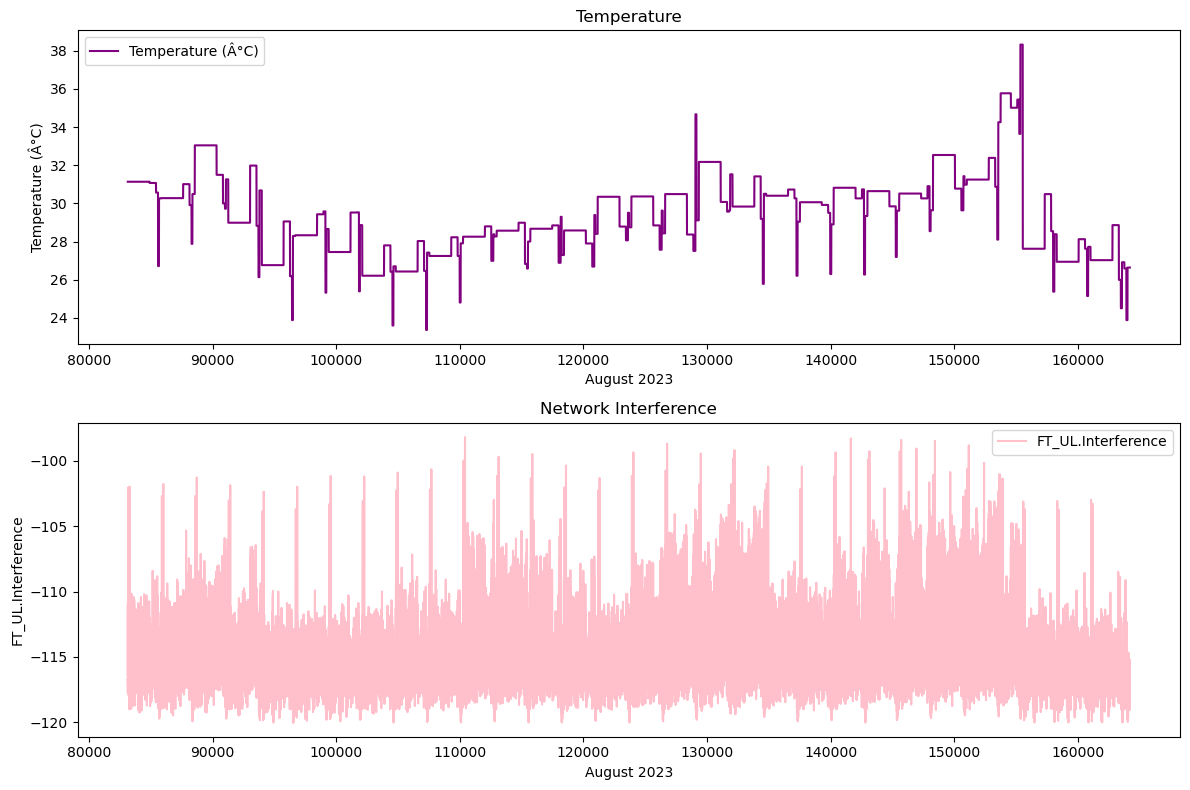

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

august_data.plot(y='Temperature (Â°C)', ax=axes[0], color='purple')
axes[0].set_title('Temperature')
axes[0].set_xlabel('August 2023')
axes[0].set_ylabel('Temperature (Â°C)')

august_data.plot(y='FT_UL.Interference', ax=axes[1], color='pink')
axes[1].set_title('Network Interference')
axes[1].set_xlabel('August 2023')
axes[1].set_ylabel('FT_UL.Interference')

plt.tight_layout()#tebdech mlakza
plt.show()


# scatter plot to visualize the relationship

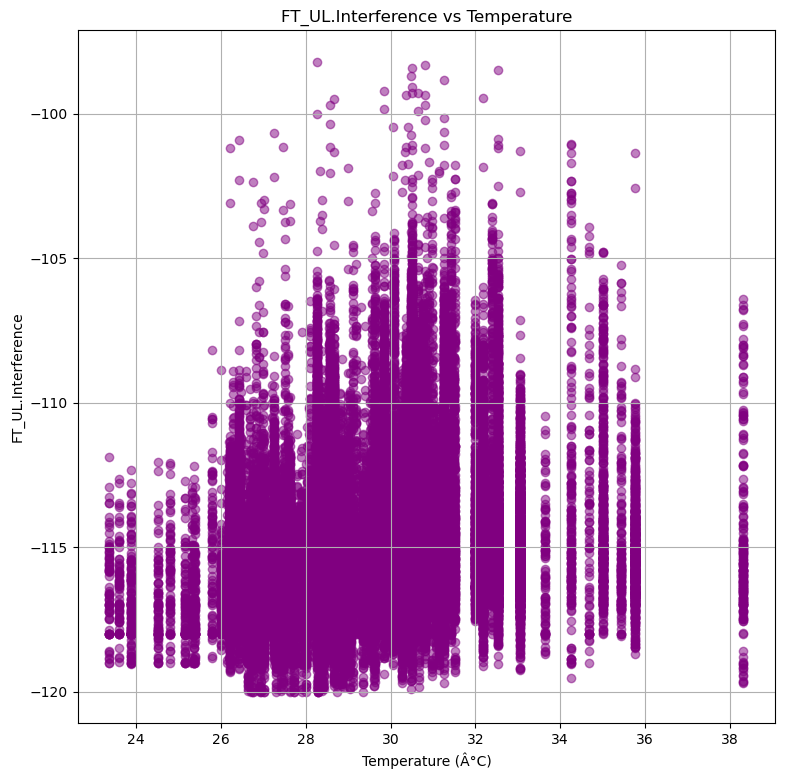

In [22]:
plt.figure(figsize=(9, 9))
plt.scatter(august_data['Temperature (Â°C)'], august_data['FT_UL.Interference'], color='purple', alpha=0.5) #alp transperancy
plt.xlabel('Temperature (Â°C)')
plt.ylabel('FT_UL.Interference')
plt.title('FT_UL.Interference vs Temperature')
plt.grid(True)
plt.show()

<span style="color: red;">The closer the data points lie together to make a line, the higher the correlation
=> certain temperature ranges have a consistent effect on the interference levels</span>


# seasonal decomposition (Interference)

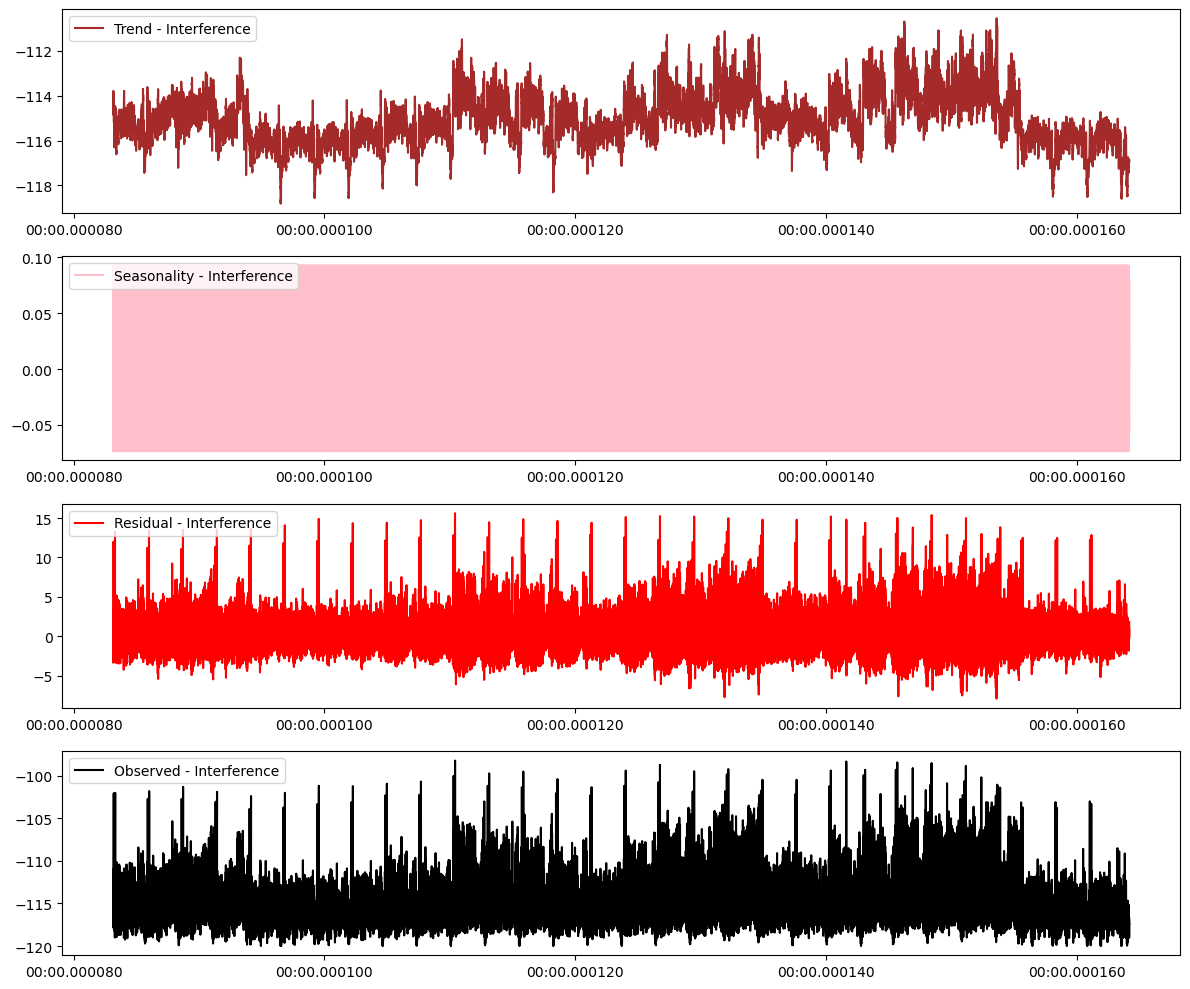

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

august_data.index = pd.to_datetime(august_data.index)

# Decompose both TS
decomposition_interference = seasonal_decompose(august_data['FT_UL.Interference'], model='additive', period=31)
#decomposition_temperature = seasonal_decompose(august_data['Temperature (Â°C)'], model='additive', period=31)

fig, axes = plt.subplots(4, 1, figsize=(12, 10))

# Plot decomposition
axes[0].plot(decomposition_interference.trend, label='Trend - Interference', color='brown')    
axes[0].legend(loc='upper left')
axes[1].plot(decomposition_interference.seasonal, label='Seasonality - Interference', color='pink') 
axes[1].legend(loc='upper left')
axes[2].plot(decomposition_interference.resid, label='Residual - Interference', color='red')  # Residual = OG - trend & seasonal
axes[2].legend(loc='upper left')
axes[3].plot(decomposition_interference.observed, label='Observed - Interference', color='black')
axes[3].legend(loc='upper left')

#axes[0].plot(decomposition_temperature.trend, label='Trend - Temperature', color='orange') 
#axes[0].legend(loc='upper right')
#axes[1].plot(decomposition_temperature.seasonal, label='Seasonality - Temperature', color='purple')
#axes[1].legend(loc='upper right')
#axes[2].plot(decomposition_temperature.resid, label='Residual - Temperature', color='blue')
#axes[2].legend(loc='upper right')
#axes[3].plot(decomposition_temperature.observed, label='Observed - Temperature', color='green')
#axes[3].legend(loc='upper right')

plt.tight_layout()
plt.show()


<span style="color: red;">->There is substantial noise shown by Residual
->The decomposition analysis indicates a strong downward trend but no significant seasonality in the interference data for august 2023
=> Model Choice: ARIMAX due to the absence of seasonality & the need to incorporate temperature as an exogenous var
</span>

# Correlogram (AutoCorrelation Function)

<Figure size 1200x600 with 0 Axes>

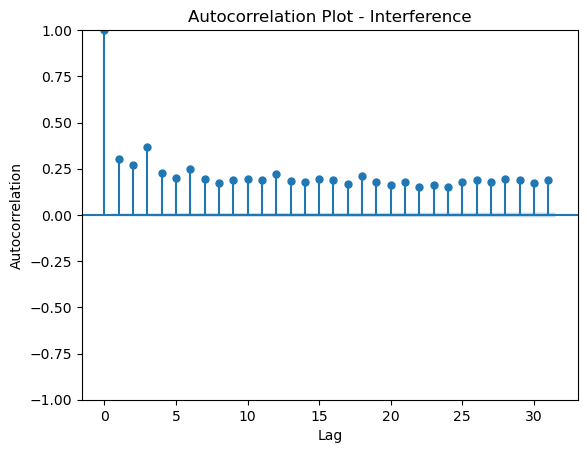

In [18]:
# x-axis; lag  &  y-axis; autocorrelation val
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(august_data['FT_UL.Interference'], lags=31, title='Autocorrelation Plot - Interference') #autocorrelation patterns at monthly interval
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


for the Interfernce : the autocorrelation remains positive and significant up to around lag 5-6 =>network interference data is autocorrelated = past values have a relationship with future values within this range

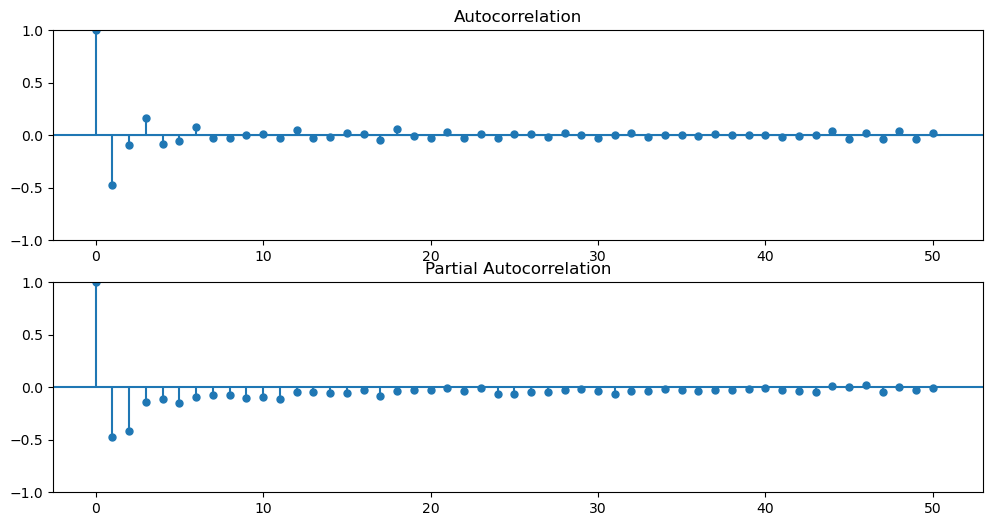

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(august_data['FT_UL.Interference'].diff().dropna(), ax=plt.gca())
plt.subplot(212)
plot_pacf(august_data['FT_UL.Interference'].diff().dropna(), ax=plt.gca())
plt.show()


# Stationarity Test

In [19]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity on interference
result_interference = adfuller(august_data['FT_UL.Interference'])
print('Interference ADF Statistic:', result_interference[0])
print('Interference p-value:', result_interference[1])

# If interference is non-stationary, difference the data
if result_interference[1] > 0.05:
    The_df['interference_diff'] = august_data['FT_UL.Interference'].diff().dropna()
    
    # Conduct ADF test on differenced interference data
    result_interference_diff = adfuller(The_df['interference_diff'])
    print('Differenced Interference ADF Statistic:', result_interference_diff[0])
    print('Differenced Interference p-value:', result_interference_diff[1])

# ADF test for stationarity on temperature
result_temperature = adfuller(august_data['Temperature (Â°C)'])
print('Temperature ADF Statistic:', result_temperature[0])
print('Temperature p-value:', result_temperature[1])

# If temperature is non-stationary, difference the data
if result_temperature[1] > 0.05:
    The_df['temperature_diff'] = august_data['Temperature (Â°C)'].diff().dropna()
    
    # Conduct ADF test on differenced temperature data
    result_temperature_diff = adfuller(august_data['temperature_diff'])
    print('Differenced Temperature ADF Statistic:', result_temperature_diff[0])
    print('Differenced Temperature p-value:', result_temperature_diff[1])


Interference ADF Statistic: -13.662029029888572
Interference p-value: 1.5150427130397198e-25
Temperature ADF Statistic: -7.33113065781246
Temperature p-value: 1.1271072670328241e-10


<span style="color: red;">ADF statistics are highly negative => strong evidence against the null hypothesis : non-stationarity
extremely low p-values = > supporting the conclusion of stationarity</span>

# <span style="color: red;">ARIMAX</span>

In [14]:
########################## INDEXATION MTA3 DATE
from pandas.tseries.frequencies import to_offset
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
august_arim = august_data.copy()

august_arim['Date'] = pd.to_datetime(august_arim['Date'], format='%Y-%m-%d', errors='coerce')
august_arim.dropna(subset=['Date'], inplace=True)
august_arim.set_index('Date', inplace=True)
august_arim.index.freq = to_offset('MS')

ValueError: Inferred frequency None from passed values does not conform to passed frequency MS

In [15]:
########################################################## STATIONARITEE
# Function to check if the series is constant
def is_constant(series):
    return series.nunique() == 1

# Function to create lagged features
def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    data.dropna(inplace=True)
    return data

# Add lagged features
lags = 5
august_arim = create_lagged_features(august_arim, 'FT_UL.Interference', lags)
august_arim = create_lagged_features(august_arim, 'Temperature (Â°C)', lags)

# Check stationarity for FT_UL.Interference
if is_constant(august_arim['FT_UL.Interference']):
    print('FT_UL.Interference is constant.')
    august_arim['network_diff'] = 0
    network_diff_start = august_arim.index[0]
else:
    if len(august_arim['FT_UL.Interference'].dropna()) > 0:
        result_interference = adfuller(august_arim['FT_UL.Interference'].dropna())
        print(f'ADF Statistic for Interference: {result_interference[0]}')
        print(f'p-value for Interference: {result_interference[1]}')
        if result_interference[1] > 0.05:
            august_arim['network_diff'] = august_arim['FT_UL.Interference'].diff().dropna()
            network_diff_start = august_arim['network_diff'].first_valid_index()
        else:
            august_arim['network_diff'] = august_arim['FT_UL.Interference']
            network_diff_start = august_arim.index[0]
    else:
        raise ValueError("Not enough data points in FT_UL.Interference after dropping NaNs.")

# Check stationarity for Temperature (°C)
if is_constant(august_arim['Temperature (Â°C)']):
    print('Temperature (°C) is constant.')
    august_arim['temp_diff'] = 0
    temp_diff_start = august_arim.index[0]
else:
    if len(august_arim['Temperature (Â°C)'].dropna()) > 0:
        result_temperature = adfuller(august_arim['Temperature (Â°C)'].dropna())
        print(f'ADF Statistic for Temperature: {result_temperature[0]}')
        print(f'p-value for Temperature: {result_temperature[1]}')
        if result_temperature[1] > 0.05:
            august_arim['temp_diff'] = august_arim['Temperature (Â°C)'].diff().dropna()
            temp_diff_start = MONTH_df['temp_diff'].first_valid_index()
        else:
            august_arim['temp_diff'] = august_arim['Temperature (Â°C)']
            temp_diff_start = august_arim.index[0]
    else:
        raise ValueError("Not enough data points in Temperature (Â°C) after dropping NaNs.")


ADF Statistic for Interference: -13.655013211193927
p-value for Interference: 1.559755516357335e-25
ADF Statistic for Temperature: -7.331016786899694
p-value for Temperature: 1.1278409862842939e-10


                               SARIMAX Results                                
Dep. Variable:           network_diff   No. Observations:                81051
Model:               SARIMAX(3, 1, 3)   Log Likelihood             -170590.450
Date:                Thu, 30 May 2024   AIC                         341204.900
Time:                        10:57:04   BIC                         341316.534
Sample:                             0   HQIC                        341239.101
                              - 81051                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature (Â°C)_Lag_1     0.0527      0.071      0.739      0.460      -0.087       0.192
Temperature (Â°C)_Lag_2    -0.2416      0.077     -3.139      0.002      -0.392      -0.091


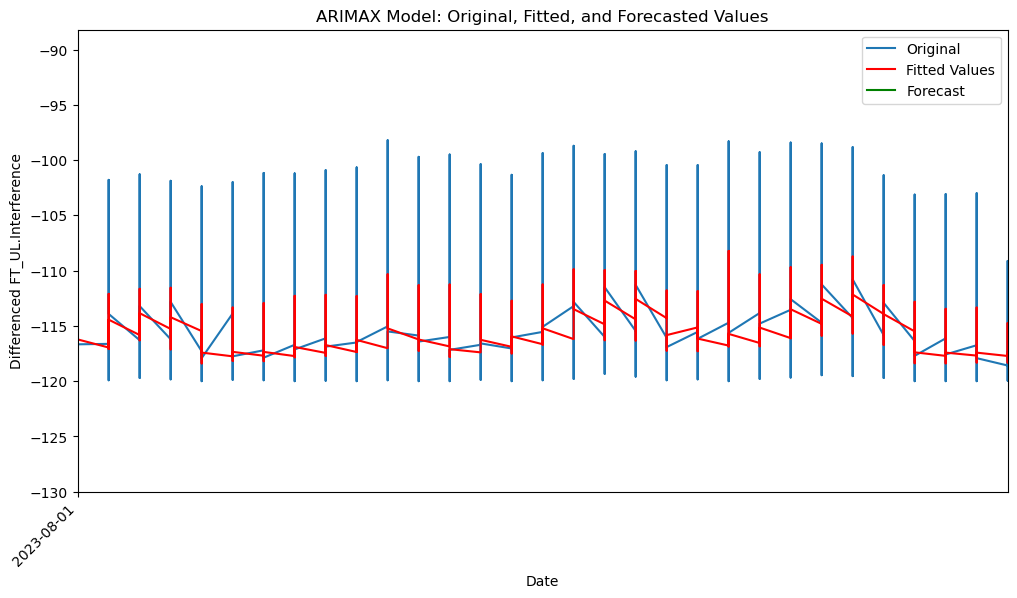

Mean Squared Error: 4.106979468881152
Mean Absolute Error: 1.4164358265786579
R-squared Score: 0.19710015666332759


In [12]:
warnings.filterwarnings("ignore")

# Assuming MONTH_df is your dataframe and lags is defined
temp_diff_start = august_arim.index[0]

# Align the start index for both differenced series if necessary
start_index = temp_diff_start
data = august_arim.loc[start_index:]

exog_vars = [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)]

# Define and fit the SARIMAX model
model = SARIMAX(data['network_diff'], exog=data[exog_vars], order=(3, 1, 3))
model_fit = model.fit(disp=False)
print(model_fit.summary())

# Forecasting future values
forecast_steps = 10  # Define the number of steps you want to forecast
exog_future = data[exog_vars].iloc[-forecast_steps:]  # Use recent exogenous data for forecasting
# Ensure exog_future has the correct shape
if exog_future.shape[0] < forecast_steps:
    raise ValueError(f"Not enough future exogenous data for forecasting. Required {forecast_steps}, got {exog_future.shape[0]}.")

forecast = model_fit.get_forecast(steps=forecast_steps, exog=exog_future)
forecast_values = forecast.predicted_mean

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data['network_diff'], label='Original')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.plot(forecast_values.index, forecast_values, color='green', label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Differenced FT_UL.Interference')
plt.title('ARIMAX Model: Original, Fitted, and Forecasted Values')

# Set x-axis limits to show only the relevant range
plt.xlim([data.index.min(), data.index.max()])

# Adjust x-axis ticks to display only the relevant years
plt.xticks(pd.date_range(start=data.index.min(), end=data.index.max(), freq='3MS').to_pydatetime(), 
           rotation=45, ha='right')

# Set y-axis limits to show only the relevant range of values
plt.ylim([data['network_diff'].min() - 10, data['network_diff'].max() + 10])

plt.show()

# Evaluation
mse = mean_squared_error(data['network_diff'], model_fit.fittedvalues)
mae = mean_absolute_error(data['network_diff'], model_fit.fittedvalues)
r2 = r2_score(data['network_diff'], model_fit.fittedvalues)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')


# searching for best values

In [13]:
###################################################################finding best  p d q
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

# Define the number of threads for parallel processing
num_threads = 4

# Suppress warnings
warnings.filterwarnings("ignore")

# Define the range of values for p, d, and q
p_values = range(5)  # Adjust the range as needed
d_values = range(5)  # Adjust the range as needed
q_values = range(5)  # Adjust the range as needed
exog_vars = [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)]

# Define the range of values for exogenous variables if needed
exog_values = [(0, 0)]  # For simplicity, assuming no exogenous variables

# Generate all possible combinations of p, d, q, and exogenous variables
parameter_combinations = list(itertools.product(p_values, d_values, q_values, exog_values))

# Define the evaluation metric
best_aic = float("inf")  # Initialize with a large value
best_params = None

def evaluate_model(params):
    p, d, q, exog_params = params
    model = SARIMAX(august_arim['network_diff'], exog=august_arim[exog_vars], order=(p, d, q), exog_order=exog_params)
    try:
        # Fit the model
        model_fit = model.fit(disp=False)
        # Calculate AIC
        aic = model_fit.aic
        return aic, params
    except:
        return float("inf"), params

# Progress bar setup
progress_bar = tqdm(total=len(parameter_combinations), desc="Processing Models")

# Use ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor(max_workers=num_threads) as executor:
    future_to_params = {executor.submit(evaluate_model, params): params for params in parameter_combinations}
    
    for future in as_completed(future_to_params):
        aic, params = future.result()
        if aic < best_aic:
            best_aic = aic
            best_params = params
        progress_bar.update(1)

progress_bar.close()

print("Best Parameters (p, d, q, exog_params):", best_params)


Processing Models: 100%|██████████| 125/125 [4:34:27<00:00, 131.74s/it]  

Best Parameters (p, d, q, exog_params): (4, 1, 4, (0, 0))


<span style="color: red;">with only the feature temperature but with new chosen values : Mean Squared Error: 4.103639609001984
Mean Absolute Error: 1.4160316627505816
R-squared Score: 0.1977530873619271 </span>


                               SARIMAX Results                                
Dep. Variable:           network_diff   No. Observations:                81048
Model:               SARIMAX(4, 1, 4)   Log Likelihood             -170448.936
Date:                Sun, 02 Jun 2024   AIC                         340939.873
Time:                        19:03:39   BIC                         341135.231
Sample:                             0   HQIC                        340999.725
                              - 81048                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Temperature (Â°C)_Lag_1     0.0897      0.129      0.695      0.487      -0.163       0.343
Temperature (Â°C)_Lag_2    -0.2858      0.124     -2.301      0.021      -0.529      -0.042


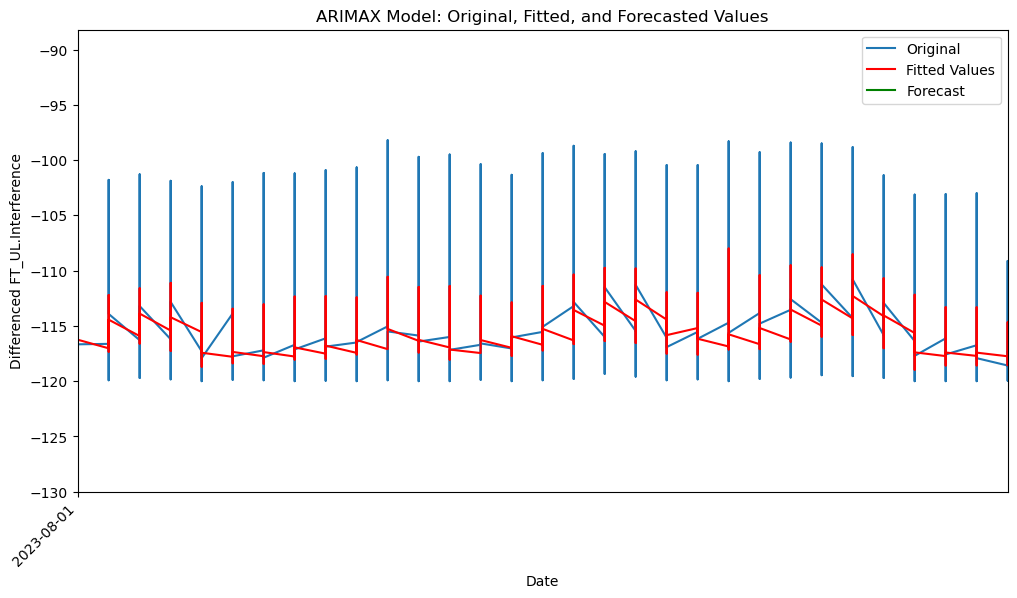

Mean Squared Error: 4.088473768302511
Mean Absolute Error: 1.4174812904836032
R-squared Score: 0.200735406027863


In [24]:
warnings.filterwarnings("ignore")

lags = 3  
temp_diff_start = august_arim.index[0]

# Generate lagged values for temperature, humidity, LocalCell Id, and Integrity
for lag in range(1, lags + 1):
    august_arim[f'Temperature (Â°C)_Lag_{lag}'] = august_arim['Temperature (Â°C)'].shift(lag)
    august_arim[f'Humidity (%)_Lag_{lag}'] = august_arim['Humidity (%)'].shift(lag)
    august_arim[f'LocalCellId_Lag_{lag}'] = august_arim['LocalCell Id'].shift(lag)
    august_arim[f'WindSpeed_Lag_{lag}'] = august_arim['Wind Speed (mph)'].shift(lag)

# Align the start index for both differenced series if necessary
start_index = temp_diff_start
data = august_arim.loc[start_index:].dropna()

# Define exogenous variables including the new features
exog_vars = (
    [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCellId_Lag_{i}' for i in range(1, lags + 1)] +
    [f'WindSpeed_Lag_{i}' for i in range(1, lags + 1)]
) 



# Define and fit the SARIMAX model
model = SARIMAX(data['network_diff'], exog=data[exog_vars], order=(4, 1, 4))
model_fit = model.fit(disp=False)
print(model_fit.summary())

# Forecasting future values
forecast_steps = 10  # Define the number of steps you want to forecast
exog_future = data[exog_vars].iloc[-forecast_steps:]  # Use recent exogenous data for forecasting
# Ensure exog_future has the correct shape
if exog_future.shape[0] < forecast_steps:
    raise ValueError(f"Not enough future exogenous data for forecasting. Required {forecast_steps}, got {exog_future.shape[0]}.")

forecast = model_fit.get_forecast(steps=forecast_steps, exog=exog_future)
forecast_values = forecast.predicted_mean

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data['network_diff'], label='Original')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.plot(forecast_values.index, forecast_values, color='green', label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Differenced FT_UL.Interference')
plt.title('ARIMAX Model: Original, Fitted, and Forecasted Values')

# Set x-axis limits to show only the relevant range
plt.xlim([data.index.min(), data.index.max()])

# Adjust x-axis ticks to display only the relevant years
plt.xticks(pd.date_range(start=data.index.min(), end=data.index.max(), freq='3MS').to_pydatetime(), 
           rotation=45, ha='right')

# Set y-axis limits to show only the relevant range of values
plt.ylim([data['network_diff'].min() - 10, data['network_diff'].max() + 10])

plt.show()

# Evaluation
mse = mean_squared_error(data['network_diff'], model_fit.fittedvalues)
mae = mean_absolute_error(data['network_diff'], model_fit.fittedvalues)
r2 = r2_score(data['network_diff'], model_fit.fittedvalues)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')


# <span style="color: red;">Random Forest Regression with Lagged Features</span>
# (bagging & boosting )

In [12]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 656.4 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.3 MB 653.6 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.3 MB 652.2 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.3 MB 605.3 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.3 MB 696.3 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.3 MB 696.3 kB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.3 MB 654.9 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.3 MB 707.1 kB/s eta 0:00:02
   ---------- ----------------------------- 0.3/1.3 MB 748.1 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.3 MB 781.2 kB/s eta 0:00:02
   ------------ --------------------------- 0.4/1.3 MB 793.8 kB/s eta 0:00:02
   -

In [18]:
august_data.index = pd.to_datetime(august_data.index)

# Create lagged features
def create_lagged_features(data, lags):
    df = data.copy()
    for lag in range(1, lags+1):
        df[f'Temperature_Lag_{lag}'] = df['Temperature (Â°C)'].shift(lag)
        df[f'Interference_Lag_{lag}'] = df['FT_UL.Interference'].shift(lag)
    df.dropna(inplace=True)
    return df

# Create lagged features for up to 5 lags
lags = 5
lagged_df = create_lagged_features(august_data, lags)


In [19]:
# Split data into train and test sets
train_size = int(len(lagged_df) * 0.8)
train_df, test_df = lagged_df.iloc[:train_size], lagged_df.iloc[train_size:]

# Define features and target
features = [col for col in lagged_df.columns if 'Lag' in col]
target = 'FT_UL.Interference'

# training & evaluation

In [16]:
# Train Random Forest 
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(train_df[features], train_df[target])

# Gradient Boosting 
gbr = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42)
gbr.fit(train_df[features], train_df[target])

# XGBoost 
xgbr = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgbr.fit(train_df[features], train_df[target])

# LightGBM 
lgbm = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgbm.fit(train_df[features], train_df[target])

# CatBoost 
catb = CatBoostRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbose=0)
catb.fit(train_df[features], train_df[target])

# AdaBoost 
abr = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
abr.fit(train_df[features], train_df[target])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1845
[LightGBM] [Info] Number of data points in the train set: 64844, number of used features: 10
[LightGBM] [Info] Start training from score -115.025588
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=42)

In [17]:
# Predict and evaluate for Random Forest
rf_predictions = rf.predict(test_df[features])
rf_mse = mean_squared_error(test_df[target], rf_predictions)
rf_mae = mean_absolute_error(test_df[target], rf_predictions)
rf_r2 = r2_score(test_df[target], rf_predictions)
print(f'Random Forest - Mean Squared Error: {rf_mse}')
print(f'Random Forest - Mean Absolute Error: {rf_mae}')
print(f'Random Forest - R-squared Score: {rf_r2}')
print("###################################################")

# Gradient Boosting
gbr_predictions = gbr.predict(test_df[features])
gbr_mse = mean_squared_error(test_df[target], gbr_predictions)
gbr_mae = mean_absolute_error(test_df[target], gbr_predictions)
gbr_r2 = r2_score(test_df[target], gbr_predictions)
print(f'Gradient Boosting - Mean Squared Error: {gbr_mse}')
print(f'Gradient Boosting - Mean Absolute Error: {gbr_mae}')
print(f'Gradient Boosting - R-squared Score: {gbr_r2}')
print("###################################################")

# XGBoost
xgbr_predictions = xgbr.predict(test_df[features])
xgbr_mse = mean_squared_error(test_df[target], xgbr_predictions)
xgbr_mae = mean_absolute_error(test_df[target], xgbr_predictions)
xgbr_r2 = r2_score(test_df[target], xgbr_predictions)
print(f'XGBoost - Mean Squared Error: {xgbr_mse}')
print(f'XGBoost - Mean Absolute Error: {xgbr_mae}')
print(f'XGBoost - R-squared Score: {xgbr_r2}')
print("###################################################")

# LightGBM
lgbm_predictions = lgbm.predict(test_df[features])
lgbm_mse = mean_squared_error(test_df[target], lgbm_predictions)
lgbm_mae = mean_absolute_error(test_df[target], lgbm_predictions)
lgbm_r2 = r2_score(test_df[target], lgbm_predictions)
print(f'LightGBM - Mean Squared Error: {lgbm_mse}')
print(f'LightGBM - Mean Absolute Error: {lgbm_mae}')
print(f'LightGBM - R-squared Score: {lgbm_r2}')
print("###################################################")

# CatBoost
catb_predictions = catb.predict(test_df[features])
catb_mse = mean_squared_error(test_df[target], catb_predictions)
catb_mae = mean_absolute_error(test_df[target], catb_predictions)
catb_r2 = r2_score(test_df[target], catb_predictions)
print(f'CatBoost - Mean Squared Error: {catb_mse}')
print(f'CatBoost - Mean Absolute Error: {catb_mae}')
print(f'CatBoost - R-squared Score: {catb_r2}')
print("###################################################")

# AdaBoost
abr_predictions = abr.predict(test_df[features])
abr_mse = mean_squared_error(test_df[target], abr_predictions)
abr_mae = mean_absolute_error(test_df[target], abr_predictions)
abr_r2 = r2_score(test_df[target], abr_predictions)
print(f'AdaBoost - Mean Squared Error: {abr_mse}')
print(f'AdaBoost - Mean Absolute Error: {abr_mae}')
print(f'AdaBoost - R-squared Score: {abr_r2}')


Random Forest - Mean Squared Error: 4.021520913230949
Random Forest - Mean Absolute Error: 1.382910110597774
Random Forest - R-squared Score: 0.38872489612428884
###################################################
Gradient Boosting - Mean Squared Error: 4.494098142903592
Gradient Boosting - Mean Absolute Error: 1.4641907602955275
Gradient Boosting - R-squared Score: 0.3168926959715973
###################################################
XGBoost - Mean Squared Error: 4.663758223836027
XGBoost - Mean Absolute Error: 1.4630415019508056
XGBoost - R-squared Score: 0.2911041980790887
###################################################
LightGBM - Mean Squared Error: 4.640535493468628
LightGBM - Mean Absolute Error: 1.4710563288283725
LightGBM - R-squared Score: 0.2946340757606658
###################################################
CatBoost - Mean Squared Error: 4.672112564988773
CatBoost - Mean Absolute Error: 1.4695492226707263
CatBoost - R-squared Score: 0.2898343300699092
##################

# Finetuning result

the model of Gradient boosting with the basic values was the best performimg between all the Boosting :
Gradient Boosting - Mean Squared Error: 4.615532812228047
Gradient Boosting - Mean Absolute Error: 1.4648222538802158
Gradient Boosting - R-squared Score: 0.29843450771222535
    
when i increased nbr of estimators from 100 to 150 => Better result 
Gradient Boosting - Mean Squared Error: 4.5954075997235515
Gradient Boosting - Mean Absolute Error: 1.4659420870786746
Gradient Boosting - R-squared Score: 0.30149355965541713

when tried to decrease the learning rate to 0,07 , i got worst result :
Gradient Boosting - Mean Squared Error: 4.645178359086652
Gradient Boosting - Mean Absolute Error: 1.4704038013235132
Gradient Boosting - R-squared Score: 0.2939283556552197

the same when i tried to increase it into 0,3 :
Gradient Boosting - Mean Squared Error: 4.613358115167696
Gradient Boosting - Mean Absolute Error: 1.4864064277002809
Gradient Boosting - R-squared Score: 0.29876506378793555

=> the best was when i increased the number of estimators 150 and max depth 5
// i didnt keep going to avoid overfitting 

// buuuuuuut either way the Random forest even before finetuning remain the best till now 
so i continued finetuning it , 
before any changes it was : 
Random Forest - Mean Squared Error: 4.037536079286874
Random Forest - Mean Absolute Error: 1.3855155564499544
Random Forest - R-squared Score: 0.38629057525274646
=>it got better result after increasing the number of estimators 
but in case, i checked for overfitting before i kept going with finetuning


# Checking for overfitting

In [7]:
models = [
    (RandomForestRegressor(n_estimators=150, random_state=42), "RF"),
    (GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42), "GB")
]

def evaluate_model(model, model_name, train_df, test_df, features, target):
    model.fit(train_df[features], train_df[target])
    
    #training data
    train_predictions = model.predict(train_df[features])
    train_r2 = r2_score(train_df[target], train_predictions)
    
    #test data
    test_predictions = model.predict(test_df[features])
    test_r2 = r2_score(test_df[target], test_predictions)
    
    print(f'{model_name} - Train')
    print(f'R-squared Score: {train_r2}')
    print(f'{model_name} - Test')
    print(f'R-squared Score: {test_r2}')
    

for model, model_name in models:
    evaluate_model(model, model_name, train_df, test_df, features, target)


RF - Train
R-squared Score: 0.9034152056158944
RF - Test
R-squared Score: 0.38872489612428884
GB - Train
R-squared Score: 0.25438486577239905
GB - Test
R-squared Score: 0.30149355965541713


<span style="color: red;">=> both these two best performing models overfit , specially Random forest</span>

<span style="color: red;">tried only adding hyperparameters but it didnt work 
(#min_samples_leaf=2
#min_samples_split=10)</span>

In [8]:
models = [
    (RandomForestRegressor(n_estimators=500, min_samples_leaf=20, random_state=42), "RF"), #reduced OF but it still remains
    (GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42), "GB")#worked(reduced overfitting)
]

def evaluate_model(model, model_name, train_df, test_df, features, target):
    model.fit(train_df[features], train_df[target])
    
    #training
    train_predictions = model.predict(train_df[features])
    train_mse = mean_squared_error(train_df[target], train_predictions)
    train_mae = mean_absolute_error(train_df[target], train_predictions)
    train_r2 = r2_score(train_df[target], train_predictions)   
    #test 
    test_predictions = model.predict(test_df[features])
    test_mse = mean_squared_error(test_df[target], test_predictions)
    test_mae = mean_absolute_error(test_df[target], test_predictions)
    test_r2 = r2_score(test_df[target], test_predictions)
    
    print(f'{model_name} - Training ')
    print(f'Mean Squared Error: {train_mse}')
    print(f'Mean Absolute Error: {train_mae}')
    print(f'R-squared : {train_r2}')
    print(f'{model_name} - Test ')
    print(f'Mean Squared Error: {test_mse}')
    print(f'Mean Absolute Error: {test_mae}')
    print(f'R-squared: {test_r2}')
    print("##########")    

for model, model_name in models:
    evaluate_model(model, model_name, train_df, test_df, features, target)

RF - Training 
Mean Squared Error: 2.8314273548914817
Mean Absolute Error: 1.1832740717917645
R-squared : 0.4037141920535262
RF - Test 
Mean Squared Error: 4.375878588619218
Mean Absolute Error: 1.4091563101646185
R-squared: 0.3348621836068767
##########
GB - Training 
Mean Squared Error: 3.3123780384042116
Mean Absolute Error: 1.3090320293458486
R-squared : 0.3024281511436798
GB - Test 
Mean Squared Error: 4.5889012120861645
Mean Absolute Error: 1.4784854065448054
R-squared: 0.30248253692663174
##########


<span style="color: red;">Gradient Boosting : i increased then also decreased the number of estimators until i got the closest Rsquared score of both training and testing => model who dont overfit but still have good score </span>

# Cross validation

In [61]:
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor(n_estimators=800, random_state=42)
cv_scores = cross_val_score(model, train_df[features], train_df[target], cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())

Cross-Validation Scores: [0.14693085 0.14189388 0.15145643 0.194856   0.23626982]
Mean R-squared Score: 0.1742813963585268


<span style="color: red;">t7asen when i increased the nbr of estimators from 0.173 to 0.174</span>

In [83]:
model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=6, random_state=42)
cv_scores = cross_val_score(model, train_df[features], train_df[target], cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())

Cross-Validation Scores: [0.1476447  0.14246299 0.14198033 0.13723214 0.17122124]
Mean R-squared Score: 0.14810828005341775


<span style="color: red;">0.12877372796260916   800 and 3 depth /////
0.145083989979545   150 and 3 depth    ///////////
0.14810828005341775   150 and 6 depth </span>

In [12]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

base_models = [
    ('rf', RandomForestRegressor(n_estimators=150, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=6, random_state=42))
]
meta_model = LinearRegression()
#stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)
# CV on stacking 
cv_scores = cross_val_score(stacking_regressor, train_df[features], train_df[target], cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())


Cross-Validation Scores: [0.1669969  0.16859505 0.1516638  0.18364116 0.23083734]
Mean R-squared Score: 0.18034685088251703


# Grid search

In [14]:
pip install tqdm #bech nchouf el progress

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm

param_grid = {
    'n_estimators': [150, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 6, 8],
    'min_samples_leaf': [1, 2, 6, 8],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

param_list = list(ParameterGrid(param_grid))
total_iterations = len(param_list)
tqdm_desc = tqdm(total=total_iterations, desc="GridSearch Progress")

best_score = -float('inf')
best_params = None

for params in param_list:
    model = GradientBoostingRegressor(random_state=42, **params)
    cv_scores = cross_val_score(model, train_df[features], train_df[target], cv=5, scoring='r2')
    mean_score = cv_scores.mean()
    
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
    
    tqdm_desc.update(1)

tqdm_desc.close()

print("Best parameters found: ", best_params)
print("Best cross-validation R-squared score: ", best_score)


GridSearch Progress:   0%|          | 0/576 [00:00<?, ?it/s]

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 300, 'subsample': 0.7}
Best cross-validation R-squared score:  0.1678318165822688


<span style="color: red;"> Result for GB: Best parameters found:  {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 300, 'subsample': 0.7}
Best cross-validation R-squared score:  0.1678318165822688 </span>

In [13]:
from joblib import Parallel, delayed #batches
param_grid = {
    'n_estimators': [150, 300, 500, 800],
    'max_depth': [3, 4, 6, 8],
    'min_samples_leaf': [1, 2, 6, 8],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

param_list = list(ParameterGrid(param_grid))
total_iterations = len(param_list)
tqdm_desc = tqdm(total=total_iterations, desc="GridSearch Progress")

best_score = -float('inf')
best_params = None

def evaluate_params(params):
    model = RandomForestRegressor(random_state=42, **params)
    cv_scores = cross_val_score(model, train_df[features], train_df[target], cv=5, scoring='r2')
    mean_score = cv_scores.mean()
    return (mean_score, params)

results = Parallel(n_jobs=-1)(delayed(evaluate_params)(params) for params in tqdm(param_list))
#Parallel(n_jobs=-1) will utilize all 16 logical processors

# Update best parameters and score
for mean_score, params in results:
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
    tqdm_desc.update(1)

tqdm_desc.close()

print("Best parameters found: ", best_params)
print("Best cross-validation R-squared score: ", best_score)


GridSearch Progress:   0%|          | 0/576 [00:00<?, ?it/s]

  0%|          | 0/576 [00:00<?, ?it/s]

Best parameters found:  {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 500}
Best cross-validation R-squared score:  0.15699448479182854


<span style="color: red;"> Best parameters found:  {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 500}
Best cross-validation R-squared score:  0.15699448479182854 </span>

# Stacking with grid search hyperparameters

In [19]:
base_models = [
    ('rf', RandomForestRegressor(n_estimators=500, max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, min_samples_leaf=1, max_depth=8, subsample=0.7, random_state=42))
] 
meta_model = LinearRegression()
#stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)
# CV on stacking 
cv_scores = cross_val_score(stacking_regressor, train_df[features], train_df[target], cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())


Cross-Validation Scores: [0.16688335 0.1605818  0.13919351 0.16363386 0.21151731]
Mean R-squared Score: 0.1683619665789874


<span style="color: red;">the stacking with the OG set of hyperparameters gave better results </span>

# Stacking & CV with hyperparameters that gave best result

In [17]:

base_models = [
    ('rf', RandomForestRegressor(n_estimators=800, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, min_samples_leaf=1, max_depth=8, subsample=0.7, random_state=42))
] 
meta_model = LinearRegression()
#stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)
# CV on stacking 
cv_scores = cross_val_score(stacking_regressor, train_df[features], train_df[target], cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())


Cross-Validation Scores: [0.16928599 0.16455703 0.14897554 0.18973277 0.23682315]
Mean R-squared Score: 0.18187489678842772


# early stopping with GB

In [28]:
# Splitting the training data further into training and validation sets
val_size = int(0.2 * len(X_train))
X_val, y_val = X_train[-val_size:], y_train[-val_size:]
X_train, y_train = X_train[:-val_size], y_train[:-val_size]

# Gradient Boosting with Early Stopping
gbr = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42)

# Variables for early stopping
min_val_mse = float('inf')
min_val_iter = 0
patience = 10  # Number of rounds to wait for improvement
patience_count = 0

# Fit the model
gbr.fit(X_train, y_train)

# Use staged_predict to implement early stopping
for i, y_pred_val in enumerate(gbr.staged_predict(X_val)):
    current_val_mse = mean_squared_error(y_val, y_pred_val)
    
    if current_val_mse < min_val_mse:
        min_val_mse = current_val_mse
        min_val_iter = i
        patience_count = 0
    else:
        patience_count += 1
    
    if patience_count >= patience:
        print(f"Early stopping at iteration {i}")
        break

# Refit the model with the optimal number of estimators found
gbr_best = GradientBoostingRegressor(n_estimators=min_val_iter + 1, learning_rate=0.1, max_depth=5, random_state=42)
gbr_best.fit(X_train, y_train)

# Predict and evaluate for Gradient Boosting
gbr_predictions = gbr_best.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_r2 = r2_score(y_test, gbr_predictions)
print(f'Gradient Boosting - Mean Squared Error: {gbr_mse}')
print(f'Gradient Boosting - Mean Absolute Error: {gbr_mae}')
print(f'Gradient Boosting - R-squared Score: {gbr_r2}')


Early stopping at iteration 51
Gradient Boosting - Mean Squared Error: 4.835833515978022
Gradient Boosting - Mean Absolute Error: 1.450416409005056
Gradient Boosting - R-squared Score: 0.26494858572544455


In [34]:
#############################################################            checking for overfitting
# Splitting the training data further into training and validation sets
val_size = int(0.2 * len(X_train))
X_val, y_val = X_train[-val_size:], y_train[-val_size:]
X_train, y_train = X_train[:-val_size], y_train[:-val_size]

# Gradient Boosting with Early Stopping
gbr = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42)

# Variables for early stopping
min_val_mse = float('inf')
min_val_iter = 0
patience = 10  # Number of rounds to wait for improvement
patience_count = 0

# Fit the model
gbr.fit(X_train, y_train)

# Use staged_predict to implement early stopping
for i, y_pred_val in enumerate(gbr.staged_predict(X_val)):
    current_val_mse = mean_squared_error(y_val, y_pred_val)
    
    if current_val_mse < min_val_mse:
        min_val_mse = current_val_mse
        min_val_iter = i
        patience_count = 0
    else:
        patience_count += 1
    
    if patience_count >= patience:
        print(f"Early stopping at iteration {i}")
        break

# Refit the model with the optimal number of estimators found
gbr_best = GradientBoostingRegressor(n_estimators=min_val_iter + 1, learning_rate=0.1, max_depth=5, random_state=42)
gbr_best.fit(X_train, y_train)

# Predict and evaluate for Gradient Boosting
gbr_predictions = gbr_best.predict(X_test)
gbr_r2 = r2_score(y_test, gbr_predictions)
print(f'Gradient Boosting - R-squared Score: {gbr_r2}')

models = [
    (GradientBoostingRegressor(n_estimators=min_val_iter + 1, learning_rate=0.1, max_depth=5, random_state=42), "GB")
]

def evaluate_model(model, model_name, train_df, test_df, features, target):
    model.fit(train_df[features], train_df[target])
    
    #training data
    train_predictions = model.predict(train_df[features])
    train_r2 = r2_score(train_df[target], train_predictions)
    
    #test data
    test_predictions = model.predict(test_df[features])
    test_r2 = r2_score(test_df[target], test_predictions)
    
    print(f'{model_name} - Train')
    print(f'R-squared Score: {train_r2}')
    print(f'{model_name} - Test')
    print(f'R-squared Score: {test_r2}')
    

for model, model_name in models:
    evaluate_model(model, model_name, train_df, test_df, features, target)


Early stopping at iteration 99
Gradient Boosting - R-squared Score: 0.23225880062625792
GB - Train
R-squared Score: 0.29621509636102694
GB - Test
R-squared Score: 0.31050683631295595


<span style="color: red;">Early stopping at iteration 99
R^2 score: 0.23225880062625792 </span>

# Smoothing techning on GB (Exponentially Weighted Averages)

In [37]:
n_estimators = 150
learning_rate = 0.1
ewa_decay = 0.9  

# Initialize the model
gbr = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=8, random_state=42)
gbr.fit(train_df[features], train_df[target])

# Generate staged predictions for EWA
staged_predictions = np.array([y_pred for y_pred in gbr.staged_predict(test_df[features])])
ewa_predictions = np.zeros_like(staged_predictions[0])

for i, preds in enumerate(staged_predictions):
    if i == 0:
        ewa_predictions = preds
    else:
        ewa_predictions = ewa_decay * ewa_predictions + (1 - ewa_decay) * preds

# Evaluate EWA predictions
gbr_mse = mean_squared_error(test_df[target], ewa_predictions)
gbr_mae = mean_absolute_error(test_df[target], ewa_predictions)
gbr_r2 = r2_score(test_df[target], ewa_predictions)
print(f'Gradient Boosting with EWA - Mean Squared Error: {gbr_mse}')
print(f'Gradient Boosting with EWA - Mean Absolute Error: {gbr_mae}')
print(f'Gradient Boosting with EWA - R-squared Score: {gbr_r2}')


Gradient Boosting with EWA - Mean Squared Error: 4.478677525973528
Gradient Boosting with EWA - Mean Absolute Error: 1.4933653241908726
Gradient Boosting with EWA - R-squared Score: 0.31923664479572


# Linear regression

In [19]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train_df[features], train_df[target])
lr_predictions = lr_model.predict(test_df[features])
mse_lr = mean_squared_error(test_df[target], lr_predictions)
mae_lr = mean_absolute_error(test_df[target], lr_predictions)
r2_lr = r2_score(test_df[target], lr_predictions)
print(f'Linear Regression - Mean Squared Error: {mse_lr}')
print(f'Linear Regression - Mean Absolute Error: {mae_lr}')
print(f'Linear Regression - R-squared Score: {r2_lr}')

Linear Regression - Mean Squared Error: 4.8573707923184655
Linear Regression - Mean Absolute Error: 1.5213522428836423
Linear Regression - R-squared Score: 0.26167489870099314


# Stacking ARIMAX & GB (EWA) & Linear regression [meta model]

Stacked Model - Mean Squared Error: 5.229499066554272
Stacked Model - Mean Absolute Error: 1.611400364993526
Stacked Model - R-squared Score: 0.20457249800120625


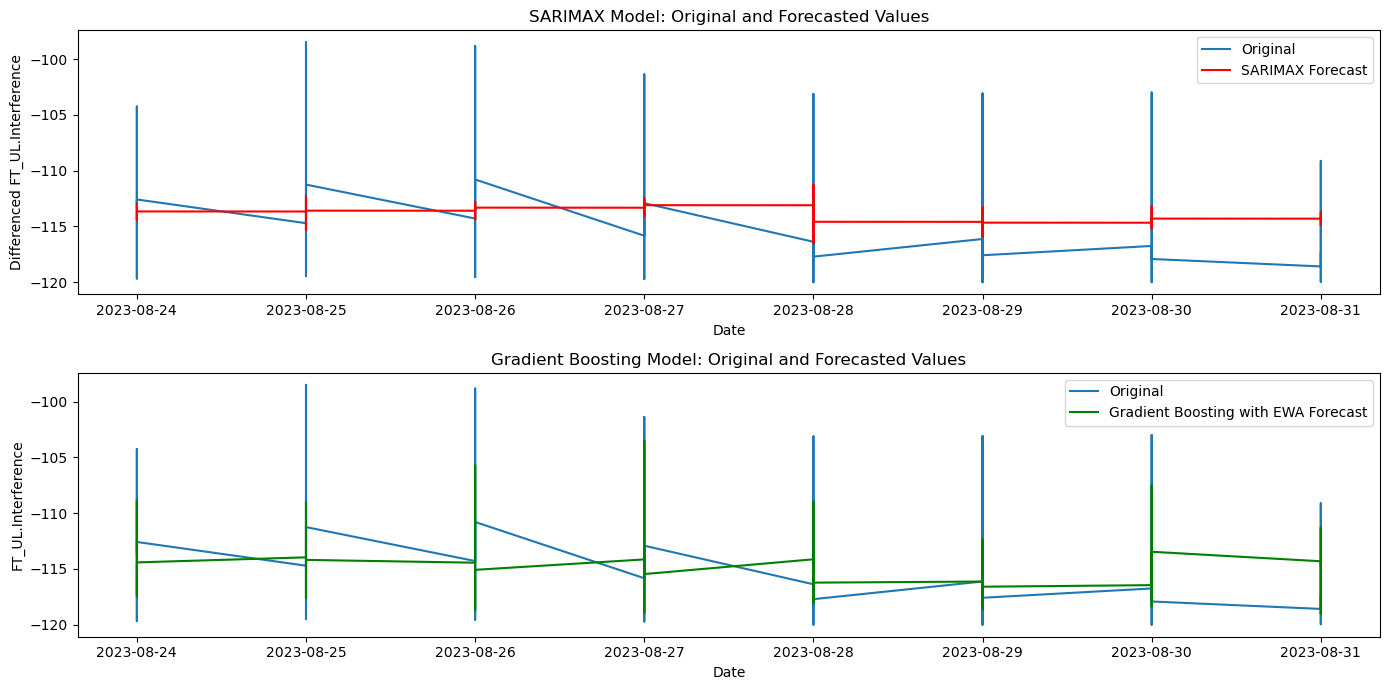

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Function to create lagged features
def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    data.dropna(inplace=True)
    return data

# Add lagged features
lags = 3
august_arim = create_lagged_features(august_arim, 'FT_UL.Interference', lags)
august_arim = create_lagged_features(august_arim, 'Temperature (Â°C)', lags)

for lag in range(1, lags + 1):
    august_arim[f'Temperature (Â°C)_Lag_{lag}'] = august_arim['Temperature (Â°C)'].shift(lag)
    august_arim[f'Humidity (%)_Lag_{lag}'] = august_arim['Humidity (%)'].shift(lag)
    august_arim[f'LocalCellId_Lag_{lag}'] = august_arim['LocalCell Id'].shift(lag)
    august_arim[f'WindSpeed_Lag_{lag}'] = august_arim['Wind Speed (mph)'].shift(lag)

# Drop NaNs and set start index
data = august_arim.dropna()

train_size = int(len(data) * 0.8)
train_df, test_df = data.iloc[:train_size], data.iloc[train_size:]

#exogenous var
exog_vars = (
    [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCellId_Lag_{i}' for i in range(1, lags + 1)] +
    [f'WindSpeed_Lag_{i}' for i in range(1, lags + 1)]
)

# SARIMAX 
sarimax_model = SARIMAX(train_df['network_diff'], exog=train_df[exog_vars], order=(4, 1, 4))
sarimax_model_fit = sarimax_model.fit(disp=False)
sarimax_predictions = sarimax_model_fit.forecast(len(test_df), exog=test_df[exog_vars])
# GB
n_estimators = 150
learning_rate = 0.1
ewa_decay = 0.9

gbr = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=8, random_state=42)
gbr.fit(train_df[exog_vars], train_df['FT_UL.Interference'])

# Generate staged predictions for EWA
staged_predictions = np.array([y_pred for y_pred in gbr.staged_predict(test_df[exog_vars])])
ewa_predictions = np.zeros_like(staged_predictions[0])

for i, preds in enumerate(staged_predictions):
    if i == 0:
        ewa_predictions = preds
    else:
        ewa_predictions = ewa_decay * ewa_predictions + (1 - ewa_decay) * preds

#stacked features
stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_predictions,
    'GBR_EWA': ewa_predictions
})

# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, test_df['FT_UL.Interference'])

# Make predictions using the meta-model
stacked_predictions = meta_model.predict(stacked_features)

# Evaluation
mse_stacked = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions)
mae_stacked = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions)
r2_stacked = r2_score(test_df['FT_UL.Interference'], stacked_predictions)
print(f'Stacked Model - Mean Squared Error: {mse_stacked}')
print(f'Stacked Model - Mean Absolute Error: {mae_stacked}')
print(f'Stacked Model - R-squared Score: {r2_stacked}')

plt.figure(figsize=(14, 7))
# SARIMAX results
plt.subplot(2, 1, 1)
plt.plot(test_df.index, test_df['network_diff'], label='Original')
plt.plot(test_df.index, sarimax_predictions, color='red', label='SARIMAX Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Differenced FT_UL.Interference')
plt.title('SARIMAX Model: Original and Forecasted Values')
# Gradient Boosting results
plt.subplot(2, 1, 2)
plt.plot(test_df.index, test_df['FT_UL.Interference'], label='Original')
plt.plot(test_df.index, ewa_predictions, color='green', label='Gradient Boosting with EWA Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('FT_UL.Interference')
plt.title('Gradient Boosting Model: Original and Forecasted Values')

plt.tight_layout()
plt.show()


<span style="color: red;">i increased lags = 5 & nbr_of_estimators = 300 => R-squared Score: 0.24143809067579636 //////////////////////////////////////////////////////////////////////////////////////////////////////
lags = 10 & nbr_of_estimators = 300 => R-squared Score: 0.3407298400137829 </span>

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Function to create lagged features
def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    data.dropna(inplace=True)
    return data

# Add lagged features
lags = 10
august_arim = create_lagged_features(august_arim, 'FT_UL.Interference', lags)
august_arim = create_lagged_features(august_arim, 'Temperature (Â°C)', lags)

for lag in range(1, lags + 1):
    august_arim[f'Temperature (Â°C)_Lag_{lag}'] = august_arim['Temperature (Â°C)'].shift(lag)
    august_arim[f'Humidity (%)_Lag_{lag}'] = august_arim['Humidity (%)'].shift(lag)
    august_arim[f'LocalCellId_Lag_{lag}'] = august_arim['LocalCell Id'].shift(lag)
    august_arim[f'WindSpeed_Lag_{lag}'] = august_arim['Wind Speed (mph)'].shift(lag)

# Drop NaNs and set start index
data = august_arim.dropna()

train_size = int(len(data) * 0.8)
train_df, test_df = data.iloc[:train_size], data.iloc[train_size:]

#exogenous var
exog_vars = (
    [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCellId_Lag_{i}' for i in range(1, lags + 1)] +
    [f'WindSpeed_Lag_{i}' for i in range(1, lags + 1)]
)

# SARIMAX 
sarimax_model = SARIMAX(train_df['network_diff'], exog=train_df[exog_vars], order=(4, 1, 4))
sarimax_model_fit = sarimax_model.fit(disp=False)
sarimax_predictions = sarimax_model_fit.forecast(len(test_df), exog=test_df[exog_vars])
# GB
n_estimators = 300
learning_rate = 0.1
ewa_decay = 0.9

gbr = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=8, random_state=42)
gbr.fit(train_df[exog_vars], train_df['FT_UL.Interference'])

# Generate staged predictions for EWA
staged_predictions = np.array([y_pred for y_pred in gbr.staged_predict(test_df[exog_vars])])
ewa_predictions = np.zeros_like(staged_predictions[0])

for i, preds in enumerate(staged_predictions):
    if i == 0:
        ewa_predictions = preds
    else:
        ewa_predictions = ewa_decay * ewa_predictions + (1 - ewa_decay) * preds

#stacked features
stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_predictions,
    'GBR_EWA': ewa_predictions
})

# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, test_df['FT_UL.Interference'])

# Make predictions using the meta-model
stacked_predictions = meta_model.predict(stacked_features)

# Evaluation
mse_stacked = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions)
mae_stacked = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions)
r2_stacked = r2_score(test_df['FT_UL.Interference'], stacked_predictions)
print(f'Stacked Model - Mean Squared Error: {mse_stacked}')
print(f'Stacked Model - Mean Absolute Error: {mae_stacked}')
print(f'Stacked Model - R-squared Score: {r2_stacked}')


Stacked Model - Mean Squared Error: 4.333576731282885
Stacked Model - Mean Absolute Error: 1.4477085727624948
Stacked Model - R-squared Score: 0.3407298400137829


# <span style="color: red;"> Best Result (ensemble learning) </span>

# <span style="color: red;"> other ways </span>

In [10]:
!pip install scikit-learn
!pip install h2o
!pip install tpot

# H2O 

In [52]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.linear_model import LinearRegression

h2o.init(max_mem_size="8G")

# Function to preprocess data
def preprocess_data(df):
    for col in df.columns:
        if df[col].dtype == 'datetime64[ns]':
            df[col] = df[col].astype('int64') / 10**9  # Convert to seconds since epoch
        else:
            # Convert non-numeric columns to numeric where possible, coercing errors
            df[col] = pd.to_numeric(df[col], errors='coerce')
    # Drop columns that are all NaN after conversion
    df = df.dropna(axis=1, how='all')
    # Fill remaining NaNs with the median value of each column
    df = df.fillna(df.median())
    return df

# Sample 100 random rows from train and test data
train_sample = train_df.sample(n=50, random_state=42)
test_sample = test_df.sample(n=50, random_state=42)

# Preprocess the sampled data
train_sample = preprocess_data(train_sample)
test_sample = preprocess_data(test_sample)

# Convert data to H2OFrame
try:
    train_h2o = h2o.H2OFrame(train_sample)
    test_h2o = h2o.H2OFrame(test_sample)
except Exception as e:
    print(f"Error converting to H2OFrame: {e}")
    h2o.shutdown(prompt=False)
    raise

# Define the predictors and response
x = list(train_sample.columns)  # List of all columns in train_sample
y = 'FT_UL.Interference'

# Ensure response column is not in predictors
x.remove(y)

# H2O AutoML with adjusted parameters
aml = H2OAutoML(max_runtime_secs=3600, seed=42, nfolds=5,
                include_algos=['GBM', 'DRF'],  # Specify algorithms to include
                exclude_algos=['XGBoost'],  # Exclude XGBoost if not available
                max_models=20)  # Limit the number of models

# Adjust parameters for specific algorithms
gbm_params = {'ntrees': 50, 'max_depth': 6, 'min_rows': 10}
drf_params = {'ntrees': 50, 'max_depth': 6, 'min_rows': 10}

aml.train(x=x, y=y, training_frame=train_h2o,
          algo_params={'GBM': gbm_params, 'DRF': drf_params})

# Get the AutoML leaderboard
aml_leaderboard = aml.leaderboard

# Get predictions on the test set
aml_predictions = aml.leader.predict(test_h2o).as_data_frame()['predict']

# Stacked features including H2O AutoML predictions
stacked_features = test_sample.copy()  # Assuming stacked_features is a DataFrame
stacked_features['H2OAutoML'] = aml_predictions

# Check for NaNs in stacked_features and fill or drop them
if stacked_features.isna().any().any():
    # Fill NaNs with median values
    stacked_features = stacked_features.fillna(stacked_features.median())

# Ensure the target column has no NaNs as well
y_test = test_sample['FT_UL.Interference'].dropna()

# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, y_test)

# Make predictions using the meta-model
stacked_predictions = meta_model.predict(stacked_features)

# Evaluation
mse_stacked = mean_squared_error(y_test, stacked_predictions)
mae_stacked = mean_absolute_error(y_test, stacked_predictions)
r2_stacked = r2_score(y_test, stacked_predictions)
print(f'Stacked Model - Mean Squared Error: {mse_stacked}')
print(f'Stacked Model - Mean Absolute Error: {mae_stacked}')
print(f'Stacked Model - R-squared Score: {r2_stacked}')

# Shut down H2O
h2o.shutdown(prompt=False)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 hours 14 mins
H2O_cluster_timezone:,Africa/Luanda
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,"21 days, 23 hours and 56 minutes"
H2O_cluster_name:,H2O_from_python_eyawo_nv08zd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,0
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Error converting to H2OFrame: Server error java.lang.IllegalArgumentException:
  Error: Total input file size of 31.7 KB is much larger than total cluster memory of Zero  , please use either a larger cluster or smaller data.
  Request: POST /3/Parse
    data: {'destination_frame': 'Key_Frame__upload_8d949ce7a52a58b3bdacaa246f144632.hex', 'parse_type': 'CSV', 'separator': '44', 'check_header': '1', 'number_columns': '27', 'chunk_size': '4194304', 'delete_on_done': 'True', 'blocking': 'False', 'column_types': '["Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric"]', 'force_col_types': 'False', 'single_quotes': 'False', 'escapechar': '0', 'column_names': '["Date","LocalCell Id","Integrity","CALL SETUP SUCCESS RATE","AVERAGE REPORTED CQI","DL TRAFFIC VOLUME (GBYTES)","RADIO DL

C:\Users\eyawo\AppData\Local\Temp\ipykernel_25372\1808417202.py:38: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)


H2O session _sid_b2eb closed.


H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Total input file size of 31.7 KB is much larger than total cluster memory of Zero  , please use either a larger cluster or smaller data.
  Request: POST /3/Parse
    data: {'destination_frame': 'Key_Frame__upload_8d949ce7a52a58b3bdacaa246f144632.hex', 'parse_type': 'CSV', 'separator': '44', 'check_header': '1', 'number_columns': '27', 'chunk_size': '4194304', 'delete_on_done': 'True', 'blocking': 'False', 'column_types': '["Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric"]', 'force_col_types': 'False', 'single_quotes': 'False', 'escapechar': '0', 'column_names': '["Date","LocalCell Id","Integrity","CALL SETUP SUCCESS RATE","AVERAGE REPORTED CQI","DL TRAFFIC VOLUME (GBYTES)","RADIO DL DELAY(ms)","Avg DL USER THRPUT without Last TTI(ALL) (KBPS)(kbit/s)","Avg NB OF USERS (UEs RRC CONNECTED)","FT_UL.Interference"," DROP CALL RATE","Temperature (Â°C)","Wind Speed (mph)","Wind Gust (mph)","Humidity (%)","Dew Point (Â°C)","Pressure (in)","Temperature_Lag_1","Interference_Lag_1","Temperature_Lag_2","Interference_Lag_2","Temperature_Lag_3","Interference_Lag_3","Temperature_Lag_4","Interference_Lag_4","Temperature_Lag_5","Interference_Lag_5"]', 'source_frames': '["upload_8d949ce7a52a58b3bdacaa246f144632"]'}


<span style="color: red;"> H2o wont work since there is memory issues  </span>

In [ ]:
from sklearn.linear_model import LinearRegression

base_models = [
    ('lr', LinearRegression()),
    ('gbr', GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, min_samples_leaf=1, max_depth=8, subsample=0.7, random_state=42))
] 
meta_model = LinearRegression()
#stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)
# CV on stacking 
cv_scores = cross_val_score(stacking_regressor, train_df[features], train_df[target], cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())


# ###################.

# including to the best stacking Model "Interference"

In [12]:
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")

# Function to create lagged features
def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    data.dropna(inplace=True)
    return data

# Add lagged features
lags = 10
august_arim = create_lagged_features(august_arim, 'FT_UL.Interference', lags)
august_arim = create_lagged_features(august_arim, 'Temperature (Â°C)', lags)

for lag in range(1, lags + 1):
    august_arim[f'Temperature (Â°C)_Lag_{lag}'] = august_arim['Temperature (Â°C)'].shift(lag)
    august_arim[f'Humidity (%)_Lag_{lag}'] = august_arim['Humidity (%)'].shift(lag)
    august_arim[f'LocalCellId_Lag_{lag}'] = august_arim['LocalCell Id'].shift(lag)
    august_arim[f'WindSpeed_Lag_{lag}'] = august_arim['Wind Speed (mph)'].shift(lag)
    august_arim[f'Interference_Lag_{lag}'] = august_arim['FT_UL.Interference'].shift(lag)

# Drop NaNs and set start index
data = august_arim.dropna()

train_size = int(len(data) * 0.8)
train_df, test_df = data.iloc[:train_size], data.iloc[train_size:]

#exogenous var
exog_vars = (
    [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCellId_Lag_{i}' for i in range(1, lags + 1)] +
    [f'WindSpeed_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Interference_Lag_{i}' for i in range(1, lags + 1)]

)

# SARIMAX 
sarimax_model = SARIMAX(train_df['network_diff'], exog=train_df[exog_vars], order=(4, 1, 4))
sarimax_model_fit = sarimax_model.fit(disp=False)
sarimax_predictions = sarimax_model_fit.forecast(len(test_df), exog=test_df[exog_vars])
# GB
n_estimators = 300
learning_rate = 0.1
ewa_decay = 0.9

gbr = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=8, random_state=42)
gbr.fit(train_df[exog_vars], train_df['FT_UL.Interference'])

# Generate staged predictions for EWA
staged_predictions = np.array([y_pred for y_pred in gbr.staged_predict(test_df[exog_vars])])
ewa_predictions = np.zeros_like(staged_predictions[0])

for i, preds in enumerate(staged_predictions):
    if i == 0:
        ewa_predictions = preds
    else:
        ewa_predictions = ewa_decay * ewa_predictions + (1 - ewa_decay) * preds

#stacked features
stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_predictions,
    'GBR_EWA': ewa_predictions
})

# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, test_df['FT_UL.Interference'])

# Make predictions using the meta-model
stacked_predictions = meta_model.predict(stacked_features)

# Evaluation
mse_stacked = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions)
mae_stacked = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions)
r2_stacked = r2_score(test_df['FT_UL.Interference'], stacked_predictions)
print(f'Stacked Model - Mean Squared Error: {mse_stacked}')
print(f'Stacked Model - Mean Absolute Error: {mae_stacked}')
print(f'Stacked Model - R-squared Score: {r2_stacked}')


Stacked Model - Mean Squared Error: 1.799951296764792
Stacked Model - Mean Absolute Error: 0.8950907949986129
Stacked Model - R-squared Score: 0.7262077115712542


<span style="color: red;"> adding interference increased the R squared score from 0,34 to 0,72  , but unfortunately later when using the model i wont have the current intereference values , so i will try to create a model that will laverage on this last model but wont need current Interferences when predicting </span>

# Stacked Model inspired by the concept of transfer learning

In [17]:
warnings.filterwarnings("ignore")

# Function to create lagged features
def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    data.dropna(inplace=True)
    return data

# Add lagged features
lags = 10
august_arim = create_lagged_features(august_arim, 'FT_UL.Interference', lags)
august_arim = create_lagged_features(august_arim, 'Temperature (Â°C)', lags)

for lag in range(1, lags + 1):
    august_arim[f'Temperature (°C)_Lag_{lag}'] = august_arim['Temperature (Â°C)'].shift(lag)
    august_arim[f'Humidity (%)_Lag_{lag}'] = august_arim['Humidity (%)'].shift(lag)
    august_arim[f'LocalCellId_Lag_{lag}'] = august_arim['LocalCell Id'].shift(lag)
    august_arim[f'WindSpeed_Lag_{lag}'] = august_arim['Wind Speed (mph)'].shift(lag)
    august_arim[f'Interference_Lag_{lag}'] = august_arim['FT_UL.Interference'].shift(lag)

# Drop NaNs and set start index
data = august_arim.dropna()

train_size = int(len(data) * 0.8)
train_df, test_df = data.iloc[:train_size], data.iloc[train_size:]

# Exogenous variables
exog_vars = (
    [f'Temperature (°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCellId_Lag_{i}' for i in range(1, lags + 1)] +
    [f'WindSpeed_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Interference_Lag_{i}' for i in range(1, lags + 1)]
)

# SARIMAX
sarimax_model = SARIMAX(train_df['network_diff'], exog=train_df[exog_vars], order=(4, 1, 4))
sarimax_model_fit = sarimax_model.fit(disp=False)
sarimax_predictions = sarimax_model_fit.forecast(len(test_df), exog=test_df[exog_vars])

# Gradient Boosting Regressor
n_estimators = 300
learning_rate = 0.1
ewa_decay = 0.9

gbr = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=8, random_state=42)
gbr.fit(train_df[exog_vars], train_df['FT_UL.Interference'])

# Generate staged predictions for EWA
staged_predictions = np.array([y_pred for y_pred in gbr.staged_predict(test_df[exog_vars])])
ewa_predictions = np.zeros_like(staged_predictions[0])

for i, preds in enumerate(staged_predictions):
    if i == 0:
        ewa_predictions = preds
    else:
        ewa_predictions = ewa_decay * ewa_predictions + (1 - ewa_decay) * preds

# Stacked features
stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_predictions,
    'GBR_EWA': ewa_predictions
})

# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, test_df['FT_UL.Interference'])

# Make predictions using the meta-model
stacked_predictions = meta_model.predict(stacked_features)

# Evaluation
mse_stacked = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions)
mae_stacked = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions)
r2_stacked = r2_score(test_df['FT_UL.Interference'], stacked_predictions)
print(f'Stacked Model - Mean Squared Error: {mse_stacked}')
print(f'Stacked Model - Mean Absolute Error: {mae_stacked}')
print(f'Stacked Model - R-squared Score: {r2_stacked}')

# Use the trained models to predict future FT_UL.Interference values
future_predictions = gbr.predict(test_df[exog_vars])

# Convert predictions to a Pandas Series for shifting
future_predictions_series = pd.Series(future_predictions, index=test_df.index)

# Create pseudo-lagged features using the predicted values
for lag in range(1, lags + 1):
    test_df[f'Interference_Lag_{lag}'] = future_predictions_series.shift(lag)

# Drop NaNs (if any) created by shifting
test_df.dropna(inplace=True)

# Re-generate SARIMAX and GBR_EWA predictions with pseudo-lagged features
sarimax_future_predictions = sarimax_model_fit.forecast(len(test_df), exog=test_df[exog_vars])
gbr_future_staged_predictions = np.array([y_pred for y_pred in gbr.staged_predict(test_df[exog_vars])])
ewa_future_predictions = np.zeros_like(gbr_future_staged_predictions[0])

for i, preds in enumerate(gbr_future_staged_predictions):
    if i == 0:
        ewa_future_predictions = preds
    else:
        ewa_future_predictions = ewa_decay * ewa_future_predictions + (1 - ewa_decay) * preds

# Stacked features for future predictions
future_stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_future_predictions,
    'GBR_EWA': ewa_future_predictions
})

# Use the meta-model for final predictions
final_predictions = meta_model.predict(future_stacked_features)

# Final evaluation
mse_final = mean_squared_error(test_df['FT_UL.Interference'], final_predictions)
mae_final = mean_absolute_error(test_df['FT_UL.Interference'], final_predictions)
r2_final = r2_score(test_df['FT_UL.Interference'], final_predictions)
print(f'Final Model - Mean Squared Error: {mse_final}')
print(f'Final Model - Mean Absolute Error: {mae_final}')
print(f'Final Model - R-squared Score: {r2_final}')


Stacked Model - Mean Squared Error: 1.7781876431999766
Stacked Model - Mean Absolute Error: 0.8973047045541381
Stacked Model - R-squared Score: 0.7294105767173377
Final Model - Mean Squared Error: 3.59204614877016
Final Model - Mean Absolute Error: 1.3116355006118343
Final Model - R-squared Score: 0.4522798537725209


# last model + using the other features at the final model too 

In [24]:

# Function to create lagged features
def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    data.dropna(inplace=True)
    return data


lags = 10
data = create_lagged_features(data, 'FT_UL.Interference', lags)
data = create_lagged_features(data, 'Temperature (Â°C)', lags)

for lag in range(1, lags + 1):
    data[f'Temperature (°C)_Lag_{lag}'] = data['Temperature (Â°C)'].shift(lag)
    data[f'Humidity (%)_Lag_{lag}'] = data['Humidity (%)'].shift(lag)
    data[f'LocalCellId_Lag_{lag}'] = data['LocalCell Id'].shift(lag)
    data[f'WindSpeed_Lag_{lag}'] = data['Wind Speed (mph)'].shift(lag)
    data[f'Interference_Lag_{lag}'] = data['FT_UL.Interference'].shift(lag)

data.dropna(inplace=True)

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train_df, test_df = data.iloc[:train_size], data.iloc[train_size:]

# Exogenous variables
exog_vars = (
    [f'Temperature (°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCellId_Lag_{i}' for i in range(1, lags + 1)] +
    [f'WindSpeed_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Interference_Lag_{i}' for i in range(1, lags + 1)]
)

# SARIMAX initial model
sarimax_model_initial = SARIMAX(train_df['FT_UL.Interference'], exog=train_df[exog_vars], order=(4, 1, 4))
sarimax_model_fit_initial = sarimax_model_initial.fit(disp=False)
sarimax_predictions_initial = sarimax_model_fit_initial.forecast(len(test_df), exog=test_df[exog_vars])

# Gradient Boosting Regressor initial model
n_estimators = 300
learning_rate = 0.1
ewa_decay = 0.9

gbr_initial = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=8, random_state=42)
gbr_initial.fit(train_df[exog_vars], train_df['FT_UL.Interference'])

# Generate staged predictions for EWA
staged_predictions = np.array([y_pred for y_pred in gbr_initial.staged_predict(test_df[exog_vars])])
ewa_predictions = np.zeros_like(staged_predictions[0])

for i, preds in enumerate(staged_predictions):
    if i == 0:
        ewa_predictions = preds
    else:
        ewa_predictions = ewa_decay * ewa_predictions + (1 - ewa_decay) * preds

# Stacked features
stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_predictions_initial,
    'GBR_EWA': ewa_predictions
})

# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, test_df['FT_UL.Interference'])

# Make predictions using the meta-model
stacked_predictions = meta_model.predict(stacked_features)

# Evaluation for initial model
mse_stacked_initial = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions)
mae_stacked_initial = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions)
r2_stacked_initial = r2_score(test_df['FT_UL.Interference'], stacked_predictions)
print(f'Initial Model - Mean Squared Error: {mse_stacked_initial}')
print(f'Initial Model - Mean Absolute Error: {mae_stacked_initial}')
print(f'Initial Model - R-squared Score: {r2_stacked_initial}')

# Future predictions without interference feature
future_predictions = gbr_initial.predict(test_df[exog_vars])

# Convert predictions to a Pandas Series for shifting
future_predictions_series = pd.Series(future_predictions, index=test_df.index)

# Create pseudo-lagged features using the predicted values
for lag in range(1, lags + 1):
    test_df[f'Interference_Lag_{lag}'] = future_predictions_series.shift(lag)

# Drop NaNs (if any) created by shifting
test_df.dropna(inplace=True)

# Re-generate SARIMAX and GBR_EWA predictions with pseudo-lagged features
sarimax_future_predictions = sarimax_model_fit_initial.forecast(len(test_df), exog=test_df[exog_vars])
gbr_future_staged_predictions = np.array([y_pred for y_pred in gbr_initial.staged_predict(test_df[exog_vars])])
ewa_future_predictions = np.zeros_like(gbr_future_staged_predictions[0])

for i, preds in enumerate(gbr_future_staged_predictions):
    if i == 0:
        ewa_future_predictions = preds
    else:
        ewa_future_predictions = ewa_decay * ewa_future_predictions + (1 - ewa_decay) * preds

# Stacked features for future predictions
future_stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_future_predictions,
    'GBR_EWA': ewa_future_predictions
})

# Use the meta-model for final predictions
final_predictions = meta_model.predict(future_stacked_features)

# Final evaluation
mse_final = mean_squared_error(test_df['FT_UL.Interference'], final_predictions)
mae_final = mean_absolute_error(test_df['FT_UL.Interference'], final_predictions)
r2_final = r2_score(test_df['FT_UL.Interference'], final_predictions)
print(f'Final Model - Mean Squared Error: {mse_final}')
print(f'Final Model - Mean Absolute Error: {mae_final}')
print(f'Final Model - R-squared Score: {r2_final}')


Initial Model - Mean Squared Error: 1.7607726679976734
Initial Model - Mean Absolute Error: 0.8904122242597401
Initial Model - R-squared Score: 0.7316791078493313
Final Model - Mean Squared Error: 3.47406625645028
Final Model - Mean Absolute Error: 1.2865163111523434
Final Model - R-squared Score: 0.4698073486350447


# adding SVR to the model 

In [10]:
# Function to create lagged features
def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    return data

lags = 10

# Create lagged features for 'FT_UL.Interference' and weather variables
august_arim = create_lagged_features(august_arim, 'FT_UL.Interference', lags)
august_arim = create_lagged_features(august_arim, 'Temperature (Â°C)', lags)
august_arim = create_lagged_features(august_arim, 'Humidity (%)', lags)
august_arim = create_lagged_features(august_arim, 'Wind Speed (mph)', lags)
august_arim = create_lagged_features(august_arim, 'LocalCell Id', lags)

# Drop rows with NaN values created by the lagging process
data = august_arim.dropna()

# Split data into training and test sets
train_size = int(len(data) * 0.8)
train_df, test_df = data.iloc[:train_size], data.iloc[train_size:]

# Exogenous variables (exclude current 'FT_UL.Interference')
exog_vars = (
    [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Wind Speed (mph)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCell Id_Lag_{i}' for i in range(1, lags + 1)] +
    [f'FT_UL.Interference_Lag_{i}' for i in range(1, lags + 1)]
)

# SARIMAX model
sarimax_model_initial = SARIMAX(train_df['FT_UL.Interference'], exog=train_df[exog_vars], order=(4, 1, 4))
sarimax_model_fit_initial = sarimax_model_initial.fit(disp=False)
sarimax_predictions_initial = sarimax_model_fit_initial.forecast(len(test_df), exog=test_df[exog_vars])

# Gradient Boosting Regressor model
n_estimators = 300
learning_rate = 0.1
ewa_decay = 0.9

gbr_initial = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=8, random_state=42)
gbr_initial.fit(train_df[exog_vars], train_df['FT_UL.Interference'])

# Generate staged predictions for EWA
staged_predictions = np.array([y_pred for y_pred in gbr_initial.staged_predict(test_df[exog_vars])])
ewa_predictions = np.zeros_like(staged_predictions[0])

for i, preds in enumerate(staged_predictions):
    if i == 0:
        ewa_predictions = preds
    else:
        ewa_predictions = ewa_decay * ewa_predictions + (1 - ewa_decay) * preds

# Stacked features
stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_predictions_initial,
    'GBR_EWA': ewa_predictions
})

# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, test_df['FT_UL.Interference'])

# Make predictions using the meta-model
stacked_predictions = meta_model.predict(stacked_features)

# Evaluation for initial model
mse_stacked_initial = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions)
mae_stacked_initial = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions)
r2_stacked_initial = r2_score(test_df['FT_UL.Interference'], stacked_predictions)
print(f'Initial Model - Mean Squared Error: {mse_stacked_initial}')
print(f'Initial Model - Mean Absolute Error: {mae_stacked_initial}')
print(f'Initial Model - R-squared Score: {r2_stacked_initial}')

# SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(train_df[exog_vars], train_df['FT_UL.Interference'])

# Generate SVR predictions for test set
svr_predictions = svr_model.predict(test_df[exog_vars])

# Add SVR predictions to stacked features
stacked_features['SVR'] = svr_predictions

# Train the meta-model including SVR predictions
meta_model_with_svr = LinearRegression()
meta_model_with_svr.fit(stacked_features, test_df['FT_UL.Interference'])

# Make predictions using the meta-model including SVR
stacked_predictions_with_svr = meta_model_with_svr.predict(stacked_features)

# Evaluate the model with SVR predictions
mse_stacked_with_svr = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions_with_svr)
mae_stacked_with_svr = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions_with_svr)
r2_stacked_with_svr = r2_score(test_df['FT_UL.Interference'], stacked_predictions_with_svr)
print(f'Model with SVR - Mean Squared Error: {mse_stacked_with_svr}')
print(f'Model with SVR - Mean Absolute Error: {mae_stacked_with_svr}')
print(f'Model with SVR - R-squared Score: {r2_stacked_with_svr}')


Initial Model - Mean Squared Error: 1.7364306138343109
Initial Model - Mean Absolute Error: 0.8811429642553664
Initial Model - R-squared Score: 0.7360784549706003
Model with SVR - Mean Squared Error: 1.7240875311462376
Model with SVR - Mean Absolute Error: 0.8762191341533757
Model with SVR - R-squared Score: 0.7379544904582888


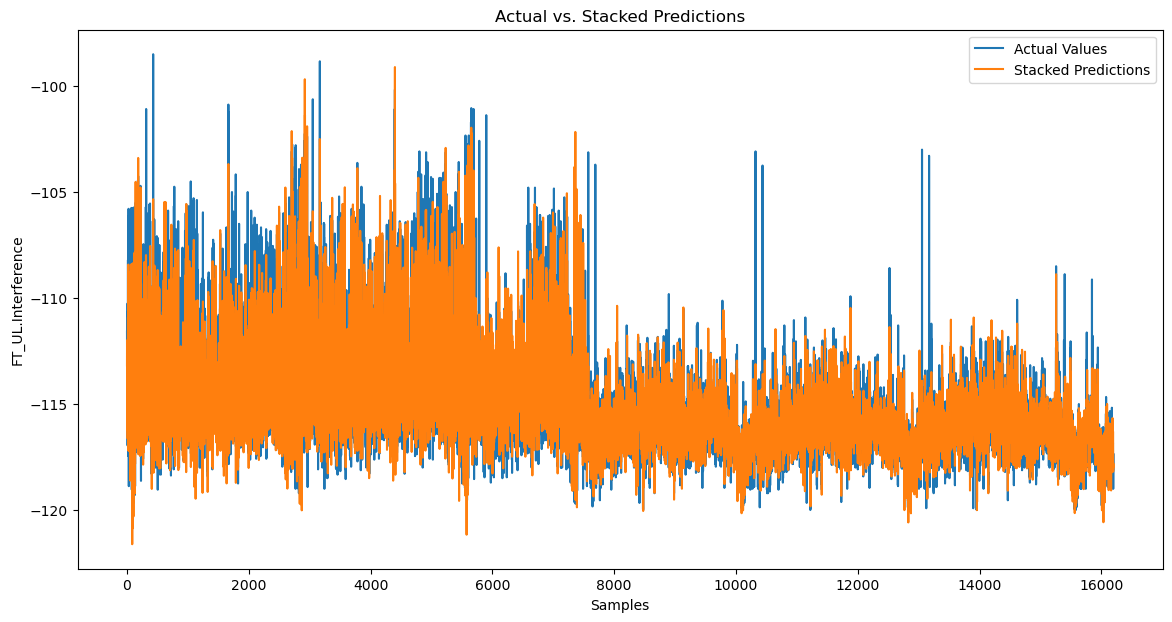

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(test_df['FT_UL.Interference'].values, label='Actual Values')
plt.plot(stacked_predictions_with_svr, label='Stacked Predictions')
plt.title('Actual vs. Stacked Predictions')
plt.xlabel('Samples')
plt.ylabel('FT_UL.Interference')
plt.legend()
plt.show()

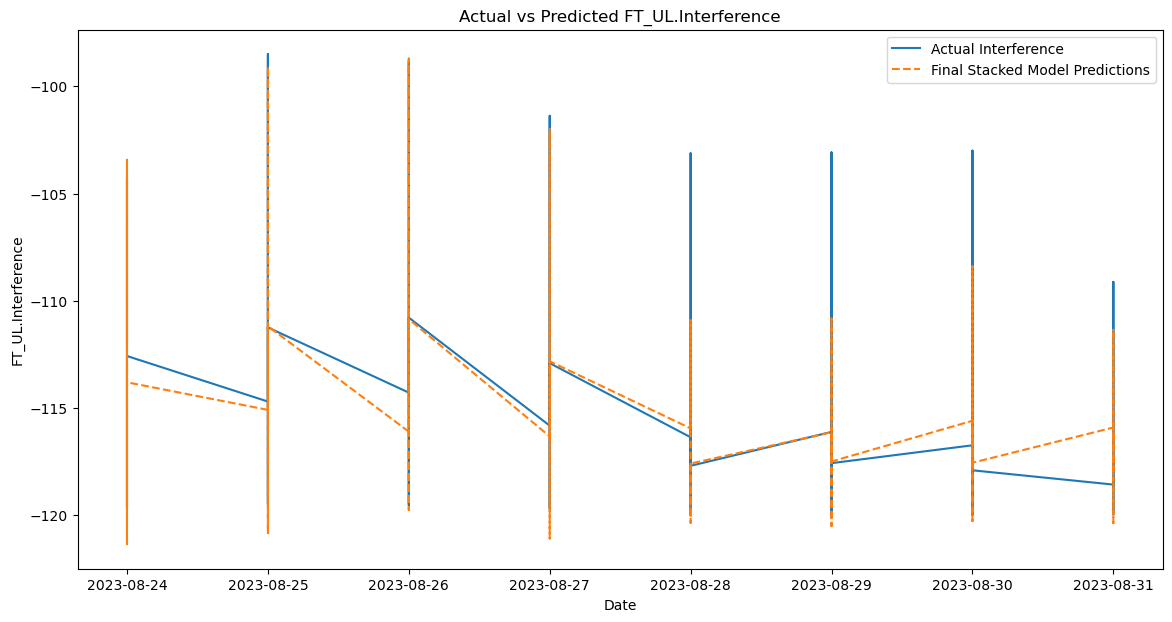

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(test_df.index, test_df['FT_UL.Interference'], label='Actual Interference')
plt.plot(test_df.index, stacked_predictions_with_svr, label='Final Stacked Model Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('FT_UL.Interference')
plt.title('Actual vs Predicted FT_UL.Interference')
plt.legend()
plt.show()

<span style="color: red;" > tried sigmoid kernel but i got worst r squared score so i will be keeping thr rbf since it is versatile too</span>

# <span style="color: red;"> Applying my ensemble learning model on the entirety of the data  </span>

In [5]:
The_df
########################## INDEXATION MTA3 DATE
from pandas.tseries.frequencies import to_offset
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
august_arim2 = The_df.copy()

august_arim2['Date'] = pd.to_datetime(august_arim2['Date'], format='%Y-%m-%d', errors='coerce')
august_arim2.dropna(subset=['Date'], inplace=True)
august_arim2.set_index('Date', inplace=True)
august_arim2.index.freq = to_offset('MS')

ValueError: Inferred frequency None from passed values does not conform to passed frequency MS

In [6]:
########################################################## STATIONARITEE
# Function to check if the series is constant
def is_constant(series):
    return series.nunique() == 1

# Function to create lagged features
def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    data.dropna(inplace=True)
    return data

# Add lagged features
lags = 5
august_arim2 = create_lagged_features(august_arim2, 'FT_UL.Interference', lags)
august_arim2 = create_lagged_features(august_arim2, 'Temperature (Â°C)', lags)

# Check stationarity for FT_UL.Interference
if is_constant(august_arim2['FT_UL.Interference']):
    print('FT_UL.Interference is constant.')
    august_arim2['network_diff'] = 0
    network_diff_start = august_arim2.index[0]
else:
    if len(august_arim2['FT_UL.Interference'].dropna()) > 0:
        result_interference = adfuller(august_arim2['FT_UL.Interference'].dropna())
        print(f'ADF Statistic for Interference: {result_interference[0]}')
        print(f'p-value for Interference: {result_interference[1]}')
        if result_interference[1] > 0.05:
            august_arim2['network_diff'] = august_arim2['FT_UL.Interference'].diff().dropna()
            network_diff_start = august_arim2['network_diff'].first_valid_index()
        else:
            august_arim2['network_diff'] = august_arim2['FT_UL.Interference']
            network_diff_start = august_arim2.index[0]
    else:
        raise ValueError("Not enough data points in FT_UL.Interference after dropping NaNs.")

# Check stationarity for Temperature (°C)
if is_constant(august_arim2['Temperature (Â°C)']):
    print('Temperature (°C) is constant.')
    august_arim2['temp_diff'] = 0
    temp_diff_start = august_arim2.index[0]
else:
    if len(august_arim2['Temperature (Â°C)'].dropna()) > 0:
        result_temperature = adfuller(august_arim2['Temperature (Â°C)'].dropna())
        print(f'ADF Statistic for Temperature: {result_temperature[0]}')
        print(f'p-value for Temperature: {result_temperature[1]}')
        if result_temperature[1] > 0.05:
            august_arim2['temp_diff'] = august_arim2['Temperature (Â°C)'].diff().dropna()
            temp_diff_start = MONTH_df['temp_diff'].first_valid_index()
        else:
            august_arim2['temp_diff'] = august_arim2['Temperature (Â°C)']
            temp_diff_start = august_arim2.index[0]
    else:
        raise ValueError("Not enough data points in Temperature (Â°C) after dropping NaNs.")


ADF Statistic for Interference: -20.614567470494293
p-value for Interference: 0.0
ADF Statistic for Temperature: -3.8257872349339674
p-value for Temperature: 0.002654227386297487


In [7]:
#august_data.index = pd.to_datetime(august_data.index)

# Create lagged features
def create_lagged_features(data, lags):
    df = data.copy()
    for lag in range(1, lags+1):
        df[f'Temperature_Lag_{lag}'] = df['Temperature (Â°C)'].shift(lag)
        df[f'Interference_Lag_{lag}'] = df['FT_UL.Interference'].shift(lag)
    df.dropna(inplace=True)
    return df

# Create lagged features for up to 5 lags
lags = 5
lagged_df = create_lagged_features(The_df, lags)
# Split data into train and test sets
train_size = int(len(lagged_df) * 0.8)
train_df, test_df = lagged_df.iloc[:train_size], lagged_df.iloc[train_size:]

# Define features and target
features = [col for col in lagged_df.columns if 'Lag' in col]
target = 'FT_UL.Interference'

In [23]:
# Function to create lagged features
def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    return data

lags = 10

# Create lagged features for 'FT_UL.Interference' and weather variables
august_arim2 = create_lagged_features(august_arim2, 'FT_UL.Interference', lags)
august_arim2 = create_lagged_features(august_arim2, 'Temperature (Â°C)', lags)
august_arim2 = create_lagged_features(august_arim2, 'Humidity (%)', lags)
august_arim2 = create_lagged_features(august_arim2, 'Wind Speed (mph)', lags)
august_arim2 = create_lagged_features(august_arim2, 'LocalCell Id', lags)

# Drop rows with NaN values created by the lagging process
data = august_arim2.dropna()

# Split data into training and test sets
train_size = int(len(data) * 0.8)
train_df, test_df = data.iloc[:train_size], data.iloc[train_size:]

# Exogenous variables (exclude current 'FT_UL.Interference')
exog_vars = (
    [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Wind Speed (mph)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCell Id_Lag_{i}' for i in range(1, lags + 1)] +
    [f'FT_UL.Interference_Lag_{i}' for i in range(1, lags + 1)]
)

# SARIMAX model
sarimax_model_initial = SARIMAX(train_df['FT_UL.Interference'], exog=train_df[exog_vars], order=(4, 1, 4))
sarimax_model_fit_initial = sarimax_model_initial.fit(disp=False)
sarimax_predictions_initial = sarimax_model_fit_initial.forecast(len(test_df), exog=test_df[exog_vars])

# Gradient Boosting Regressor model
n_estimators = 300
learning_rate = 0.1
ewa_decay = 0.9

gbr_initial = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=8, random_state=42)
gbr_initial.fit(train_df[exog_vars], train_df['FT_UL.Interference'])

# Generate staged predictions for EWA
staged_predictions = np.array([y_pred for y_pred in gbr_initial.staged_predict(test_df[exog_vars])])
ewa_predictions = np.zeros_like(staged_predictions[0])

for i, preds in enumerate(staged_predictions):
    if i == 0:
        ewa_predictions = preds
    else:
        ewa_predictions = ewa_decay * ewa_predictions + (1 - ewa_decay) * preds

# Stacked features
stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_predictions_initial,
    'GBR_EWA': ewa_predictions
})

# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, test_df['FT_UL.Interference'])

# Make predictions using the meta-model
stacked_predictions = meta_model.predict(stacked_features)

# Evaluation for initial model
mse_stacked_initial = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions)
mae_stacked_initial = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions)
r2_stacked_initial = r2_score(test_df['FT_UL.Interference'], stacked_predictions)
print(f'Initial Model - Mean Squared Error: {mse_stacked_initial}')
print(f'Initial Model - Mean Absolute Error: {mae_stacked_initial}')
print(f'Initial Model - R-squared Score: {r2_stacked_initial}')

# SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(train_df[exog_vars], train_df['FT_UL.Interference'])

# Generate SVR predictions for test set
svr_predictions = svr_model.predict(test_df[exog_vars])

# Add SVR predictions to stacked features
stacked_features['SVR'] = svr_predictions

# Train the meta-model including SVR predictions
meta_model_with_svr = LinearRegression()
meta_model_with_svr.fit(stacked_features, test_df['FT_UL.Interference'])

# Make predictions using the meta-model including SVR
stacked_predictions_with_svr = meta_model_with_svr.predict(stacked_features)

# Evaluate the model with SVR predictions
mse_stacked_with_svr = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions_with_svr)
mae_stacked_with_svr = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions_with_svr)
r2_stacked_with_svr = r2_score(test_df['FT_UL.Interference'], stacked_predictions_with_svr)
print(f'Model with SVR - Mean Squared Error: {mse_stacked_with_svr}')
print(f'Model with SVR - Mean Absolute Error: {mae_stacked_with_svr}')
print(f'Model with SVR - R-squared Score: {r2_stacked_with_svr}')


Initial Model - Mean Squared Error: 2.5175060300339998
Initial Model - Mean Absolute Error: 1.0578529064950828
Initial Model - R-squared Score: 0.6173422149932475
Model with SVR - Mean Squared Error: 2.5151388898125795
Model with SVR - Mean Absolute Error: 1.0574784857623316
Model with SVR - R-squared Score: 0.6177020173623871


<span style="color: red;" > I tried applying my model on 3 types of data , the main one which is the augut data which is when the tempereature rise , that one obviously gave me the best score of 0,73 then applied my model on the entire daily data that i have , which also gave good score of 0,61 , but when i applied my model on monthly data it didnt give as good of score </span>

# <span style="color: red;" > Pickling final</span>

In [17]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Assuming The_df is your original DataFrame

# Drop rows with missing values and prepare data
august_arim2 = august_data.dropna().copy()

# Define features and target
exog_vars = ['Temperature (Â°C)', 'Humidity (%)', 'Wind Speed (mph)', 'LocalCell Id']

# Split data into train and test sets
train_df, test_df = train_test_split(august_arim2, test_size=0.2, random_state=42)

# SARIMAX model
sarimax_model = SARIMAX(train_df['FT_UL.Interference'], exog=train_df[exog_vars], order=(4, 1, 4))
sarimax_model_fit = sarimax_model.fit(disp=False)
sarimax_predictions = sarimax_model_fit.forecast(len(test_df), exog=test_df[exog_vars])

# Gradient Boosting Regressor model
n_estimators = 300
learning_rate = 0.1
gbr = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=8, random_state=42)
gbr.fit(train_df[exog_vars], train_df['FT_UL.Interference'])
gbr_predictions = gbr.predict(test_df[exog_vars])

# SVR model
svr = SVR(kernel='rbf')
svr.fit(train_df[exog_vars], train_df['FT_UL.Interference'])
svr_predictions = svr.predict(test_df[exog_vars])

# Stack predictions for meta-model
stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_predictions,
    'GBR': gbr_predictions,
    'SVR': svr_predictions
})

# Meta-model (Linear Regression)
meta_model = LinearRegression()
meta_model.fit(stacked_features, test_df['FT_UL.Interference'])
stacked_predictions = meta_model.predict(stacked_features)

# Evaluate stacked predictions
mse_stacked = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions)
mae_stacked = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions)
r2_stacked = r2_score(test_df['FT_UL.Interference'], stacked_predictions)

print(f'Stacked Model - Mean Squared Error: {mse_stacked}')
print(f'Stacked Model - Mean Absolute Error: {mae_stacked}')
print(f'Stacked Model - R-squared Score: {r2_stacked}')

# Manual data testing (assuming input_df is prepared similarly)
input_df = pd.DataFrame({
    'Temperature (Â°C)': [25.6],
    'Humidity (%)': [60.2],
    'Wind Speed (mph)': [10.5],
    'LocalCell Id': [52]
})

# Predict using the models
sarimax_prediction = sarimax_model_fit.forecast(steps=1, exog=input_df[exog_vars])
gbr_prediction = gbr.predict(input_df)
svr_prediction = svr.predict(input_df)

# Stack predictions for manual data
stacked_manual = pd.DataFrame({
    'SARIMAX': sarimax_prediction,
    'GBR': gbr_prediction,
    'SVR': svr_prediction
})

# Predict with meta-model
meta_prediction = meta_model.predict(stacked_manual)
print(f'Meta-model Prediction: {meta_prediction}')


Stacked Model - Mean Squared Error: 3.6126917948975663
Stacked Model - Mean Absolute Error: 1.3837680414234286
Stacked Model - R-squared Score: 0.29613916667869866
Meta-model Prediction: [-116.59772469]


In [12]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Assuming The_df is your original DataFrame

# Drop rows with missing values and prepare data
august_arim2 = august_data.dropna().copy()

# Define features and target
exog_vars = ['Temperature (Â°C)', 'Humidity (%)', 'Wind Speed (mph)', 'LocalCell Id', 'Historical Interference']

# Create Historical Interference features
august_arim2['Historical Interference'] = august_arim2.groupby('LocalCell Id')['FT_UL.Interference'].transform(lambda x: x.shift(1).fillna(method='bfill'))

# Aggregate historical interference values (e.g., using rolling mean)
august_arim2['Historical Interference_Mean'] = august_arim2.groupby('LocalCell Id')['FT_UL.Interference'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Include aggregated features in exog_vars
exog_vars.append('Historical Interference_Mean')

# Split data into train and test sets
train_df, test_df = train_test_split(august_arim2, test_size=0.2, random_state=42)

# SARIMAX model
sarimax_model = SARIMAX(train_df['FT_UL.Interference'], exog=train_df[exog_vars], order=(4, 1, 4))
sarimax_model_fit = sarimax_model.fit(disp=False)
sarimax_predictions = sarimax_model_fit.forecast(len(test_df), exog=test_df[exog_vars])

# Gradient Boosting Regressor model
n_estimators = 300
learning_rate = 0.1
gbr = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=8, random_state=42)
gbr.fit(train_df[exog_vars], train_df['FT_UL.Interference'])
gbr_predictions = gbr.predict(test_df[exog_vars])

# SVR model
svr = SVR(kernel='rbf')
svr.fit(train_df[exog_vars], train_df['FT_UL.Interference'])
svr_predictions = svr.predict(test_df[exog_vars])

# Stack predictions for meta-model
stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_predictions,
    'GBR': gbr_predictions,
    'SVR': svr_predictions
})

# Meta-model (Linear Regression)
meta_model = LinearRegression()
meta_model.fit(stacked_features, test_df['FT_UL.Interference'])
stacked_predictions = meta_model.predict(stacked_features)

# Evaluate stacked predictions
mse_stacked = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions)
mae_stacked = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions)
r2_stacked = r2_score(test_df['FT_UL.Interference'], stacked_predictions)

print(f'Stacked Model - Mean Squared Error: {mse_stacked}')
print(f'Stacked Model - Mean Absolute Error: {mae_stacked}')
print(f'Stacked Model - R-squared Score: {r2_stacked}')

# Manual data testing (assuming input_df is prepared similarly)
input_df = pd.DataFrame({
    'Temperature (Â°C)': [25.6],
    'Humidity (%)': [60.2],
    'Wind Speed (mph)': [10.5],
    'LocalCell Id': [52],
    'Historical Interference': [-100.2],  # example value
    'Historical Interference_Mean': [-114.5]  # example value
})

# Predict using the models
sarimax_prediction = sarimax_model_fit.forecast(steps=1, exog=input_df[exog_vars])
gbr_prediction = gbr.predict(input_df)
svr_prediction = svr.predict(input_df)

# Stack predictions for manual data
stacked_manual = pd.DataFrame({
    'SARIMAX': sarimax_prediction,
    'GBR': gbr_prediction,
    'SVR': svr_prediction
})

# Predict with meta-model
meta_prediction = meta_model.predict(stacked_manual)
print(f'Meta-model Prediction: {meta_prediction}')


Stacked Model - Mean Squared Error: 2.6793817025708444
Stacked Model - Mean Absolute Error: 1.185720779861795
Stacked Model - R-squared Score: 0.47797599545553415
Meta-model Prediction: [-117.43497892]


In [11]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Assuming august_data is your DataFrame
# Drop rows with missing values and prepare data
august_arim2 = august_data.dropna().copy()

# Define features and target
exog_vars = ['Temperature (Â°C)', 'Humidity (%)', 'Wind Speed (mph)', 'LocalCell Id', 'Historical Interference']

# Create Historical Interference features
# Use the closest temperature for calculating historical interference
def find_closest_temperature(temp, df):
    closest_idx = (df['Temperature (Â°C)'] - temp).abs().idxmin()
    return df.loc[closest_idx, 'FT_UL.Interference']

# Apply the closest temperature function for each cell
august_arim2['Historical Interference'] = august_arim2.apply(
    lambda row: find_closest_temperature(row['Temperature (Â°C)'], august_arim2[august_arim2['Cell Name'] == row['Cell Name']]),
    axis=1
)

# Aggregate historical interference values (e.g., using rolling mean)
august_arim2['Historical Interference_Mean'] = august_arim2.groupby('Cell Name')['FT_UL.Interference'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Include aggregated features in exog_vars
exog_vars.append('Historical Interference_Mean')

# Split data into train and test sets
train_df, test_df = train_test_split(august_arim2, test_size=0.2, random_state=42)

# SARIMAX model
sarimax_model = SARIMAX(train_df['FT_UL.Interference'], exog=train_df[exog_vars], order=(4, 1, 4))
sarimax_model_fit = sarimax_model.fit(disp=False)
sarimax_predictions = sarimax_model_fit.forecast(len(test_df), exog=test_df[exog_vars])

# Gradient Boosting Regressor model
n_estimators = 300
learning_rate = 0.1
gbr = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=8, random_state=42)
gbr.fit(train_df[exog_vars], train_df['FT_UL.Interference'])
gbr_predictions = gbr.predict(test_df[exog_vars])

# SVR model
svr = SVR(kernel='rbf')
svr.fit(train_df[exog_vars], train_df['FT_UL.Interference'])
svr_predictions = svr.predict(test_df[exog_vars])

# Stack predictions for meta-model
stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_predictions,
    'GBR': gbr_predictions,
    'SVR': svr_predictions
})

# Meta-model (Linear Regression)
meta_model = LinearRegression()
meta_model.fit(stacked_features, test_df['FT_UL.Interference'])
stacked_predictions = meta_model.predict(stacked_features)

# Evaluate stacked predictions
mse_stacked = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions)
mae_stacked = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions)
r2_stacked = r2_score(test_df['FT_UL.Interference'], stacked_predictions)

print(f'Stacked Model - Mean Squared Error: {mse_stacked}')
print(f'Stacked Model - Mean Absolute Error: {mae_stacked}')
print(f'Stacked Model - R-squared Score: {r2_stacked}')



Stacked Model - Mean Squared Error: 0.004574195299908422
Stacked Model - Mean Absolute Error: 0.00923334219517674
Stacked Model - R-squared Score: 0.999108809414599


In [15]:
filtered_df = august_data[august_data['FT_UL.Interference'] > -100]
cell_names_with_low_interference = filtered_df['Cell Name'].unique()
print(f'Cell Names with Interference < -100: {cell_names_with_low_interference}')


Cell Names with Interference < -100: ['ARI_0012_C01_M32_k1' 'ARI_0115_C04_M32_k1' 'TUN_0095_C02_309_p1'
 'TUN_0095_C02_309_k1']


In [16]:
cell_name = 'ARI_0012_C01_M32_k1'
filtered_rows = august_data[august_data['Cell Name'] == cell_name]
print(filtered_rows)


             Date  eNodeB Name            Cell Name  LocalCell Id  Integrity  \
83306  2023-08-01  ARI_0012_TC  ARI_0012_C01_M32_k1            54        1.0   
86018  2023-08-02  ARI_0012_TC  ARI_0012_C01_M32_k1            54        1.0   
88723  2023-08-03  ARI_0012_TC  ARI_0012_C01_M32_k1            54        1.0   
91431  2023-08-04  ARI_0012_TC  ARI_0012_C01_M32_k1            54        1.0   
94143  2023-08-05  ARI_0012_TC  ARI_0012_C01_M32_k1            54        1.0   
96849  2023-08-06  ARI_0012_TC  ARI_0012_C01_M32_k1            54        1.0   
99555  2023-08-07  ARI_0012_TC  ARI_0012_C01_M32_k1            54        1.0   
102269 2023-08-08  ARI_0012_TC  ARI_0012_C01_M32_k1            54        1.0   
104981 2023-08-09  ARI_0012_TC  ARI_0012_C01_M32_k1            54        1.0   
107700 2023-08-10  ARI_0012_TC  ARI_0012_C01_M32_k1            54        1.0   
110421 2023-08-11  ARI_0012_TC  ARI_0012_C01_M32_k1            54        1.0   
113142 2023-08-12  ARI_0012_TC  ARI_0012

In [20]:
cell_name = 'ARI_0012_C01_M32_k1'
forecasted_temp = 34

input_df = pd.DataFrame({
    'Temperature (Â°C)': [forecasted_temp],
    'Humidity (%)': [60.2],
    'Wind Speed (mph)': [10.5],
    'LocalCell Id': [54],  # Ensure this matches the format in your dataset
    'Cell Name': [cell_name]  # Ensure this matches the format in your dataset
})

def find_closest_temperature(temp, df):
    closest_idx = (df['Temperature (Â°C)'] - temp).abs().idxmin()
    return df.loc[closest_idx, 'FT_UL.Interference']

# Calculate 'Historical Interference' and 'Historical Interference_Mean' for the input
input_df['Historical Interference'] = input_df.apply(
    lambda row: find_closest_temperature(row['Temperature (Â°C)'], august_arim2[august_arim2['Cell Name'] == row['Cell Name']]),
    axis=1
)

input_df['Historical Interference_Mean'] = august_arim2[august_arim2['Cell Name'] == input_df['Cell Name'].values[0]]['Historical Interference_Mean'].mean()

# Ensure all necessary features are included
exog_vars = ['Temperature (Â°C)', 'Humidity (%)', 'Wind Speed (mph)', 'LocalCell Id', 'Historical Interference', 'Historical Interference_Mean']

# Predict using the models
sarimax_prediction = sarimax_model_fit.forecast(steps=1, exog=input_df[exog_vars])
gbr_prediction = gbr.predict(input_df[exog_vars])
svr_prediction = svr.predict(input_df[exog_vars])

# Stack predictions for manual data
stacked_manual = pd.DataFrame({
    'SARIMAX': sarimax_prediction,
    'GBR': gbr_prediction,
    'SVR': svr_prediction
})

# Predict with meta-model
meta_prediction = meta_model.predict(stacked_manual)
print(f'Meta-model Prediction: {meta_prediction}')


Meta-model Prediction: [-101.29758476]


In [13]:
import joblib

# Save SARIMAX model
joblib.dump(sarimax_model_fit, 'sarimax_model.pkl')

# Save Gradient Boosting Regressor model
joblib.dump(gbr, 'gbr_model.pkl')

# Save SVR model
joblib.dump(svr, 'svr_model.pkl')

# Save Meta-model (Linear Regression)
joblib.dump(meta_model, 'meta_model.pkl')


['meta_model.pkl']

# <span style="color: red;">Neural Network </span>

# LSTM

In [10]:
def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    return data

lags = 10

# Create lagged features for 'FT_UL.Interference' and weather variables
august_arim = create_lagged_features(august_arim, 'FT_UL.Interference', lags)
august_arim = create_lagged_features(august_arim, 'Temperature (Â°C)', lags)
august_arim = create_lagged_features(august_arim, 'Humidity (%)', lags)
august_arim = create_lagged_features(august_arim, 'Wind Speed (mph)', lags)
august_arim = create_lagged_features(august_arim, 'LocalCell Id', lags)

# Drop rows with NaN values created by the lagging process
data = august_arim.dropna()

# Split data into training and test sets
train_size = int(len(data) * 0.8)
train_df, test_df = data.iloc[:train_size], data.iloc[train_size:]

# Exogenous variables (exclude current 'FT_UL.Interference')
exog_vars = (
    [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Wind Speed (mph)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCell Id_Lag_{i}' for i in range(1, lags + 1)] +
    [f'FT_UL.Interference_Lag_{i}' for i in range(1, lags + 1)]
)

def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    return data
lags = 10
data = create_lagged_features(august_arim, 'FT_UL.Interference', lags)
data = create_lagged_features(data, 'Temperature (Â°C)', lags)
data = create_lagged_features(data, 'Humidity (%)', lags)
data = create_lagged_features(data, 'Wind Speed (mph)', lags)
data = create_lagged_features(data, 'LocalCell Id', lags)
data = data.dropna()
features = (
    [f'FT_UL.Interference_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Wind Speed (mph)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCell Id_Lag_{i}' for i in range(1, lags + 1)]
)
target = 'FT_UL.Interference'
train_size = int(len(data) * 0.8)
train_df, test_df = data.iloc[:train_size], data.iloc[train_size:]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[features])
test_scaled = scaler.transform(test_df[features])

# Create input and output sequences for LSTM
def create_sequences(data, lags):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i])
        y.append(data[i, 0])  # FT_UL.Interference is the first column after scaling
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, lags)
X_test, y_test = create_sequences(test_scaled, lags)

# Define the LSTM model for Keras Tuner
def build_lstm_model(hp):
    model = Sequential()
    
    # Tune the number of LSTM layers and units
    for i in range(hp.Int('num_lstm_layers', 1, 3)):
        model.add(
            LSTM(
                units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                activation=hp.Choice('lstm_activation', ['relu', 'tanh']),
                return_sequences=(i < hp.Int('num_lstm_layers', 1, 3) - 1),
                input_shape=(X_train.shape[1], X_train.shape[2])
            )
        )
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))
    

In [2]:
!pip install tensorflow

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl

   ---------------- --------------------- 161.5/377.0 MB 852.5 kB/s eta 0:04:13
   ---------------- --------------------- 161.6/377.0 MB 848.1 kB/s eta 0:04:14
   ---------------- --------------------- 161.7/377.0 MB 853.5 kB/s eta 0:04:13
   ---------------- --------------------- 161.7/377.0 MB 849.2 kB/s eta 0:04:14
   ---------------- --------------------- 161.8/377.0 MB 851.3 kB/s eta 0:04:13
   ---------------- --------------------- 161.9/377.0 MB 851.3 kB/s eta 0:04:13
   ---------------- --------------------- 162.0/377.0 MB 851.3 kB/s eta 0:04:13
   ---------------- --------------------- 162.1/377.0 MB 849.2 kB/s eta 0:04:14
   ---------------- --------------------- 162.2/377.0 MB 848.1 kB/s eta 0:04:14
   ---------------- --------------------- 162.2/377.0 MB 849.2 kB/s eta 0:04:13
   ---------------- --------------------- 162.2/377.0 MB 849.2 kB/s eta 0:04:13
   ---------------- --------------------- 162.2/377.0 MB 849.2 kB/s eta 0:04:13
   ---------------- --------------------

Epoch 1/50
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4319.3628 - val_loss: 207.7449
Epoch 2/50
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 169.7762 - val_loss: 44.8289
Epoch 3/50
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 25.2791 - val_loss: 5.8992
Epoch 4/50
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5.5623 - val_loss: 4.3987
Epoch 5/50
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.6549 - val_loss: 4.1854
Epoch 6/50
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.5035 - val_loss: 4.1466
Epoch 7/50
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4475 - val_loss: 4.1627
Epoch 8/50
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4445 - val_loss: 4.1390
Epoch 9/50
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - loss: 4.3677 - val_loss: 3.9858
Epoch 10/50
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.3594 - val_loss: 4.3533
Epoch 11/50
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.2602 - val_loss: 4.0023
Epoch 12/50
1621/16

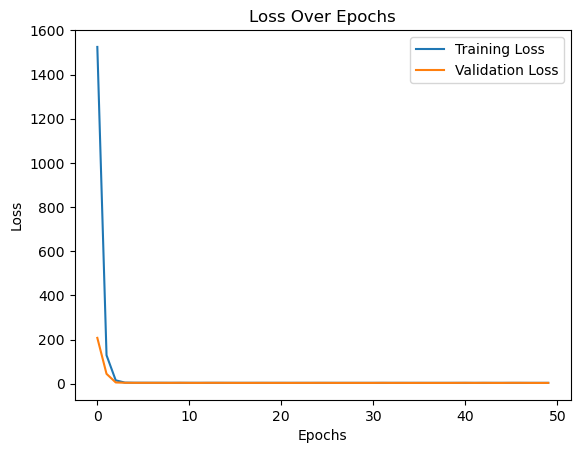

Mean Squared Error: 3.836135149002075
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step


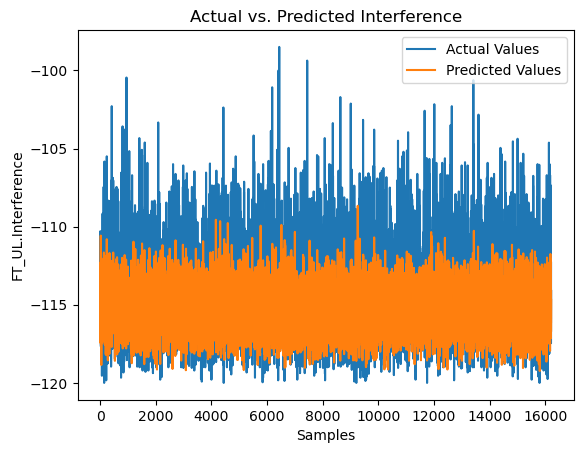

In [18]:
X = data[exog_vars].values
y = data['FT_UL.Interference'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(units=1)  # Output layer with 1 neuron for interference prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)
 
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

mse = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Mean Squared Error: {mse}')

predictions = model.predict(X_test_reshaped)


# finetuninig LSTM with keras

In [26]:
pip install keras-tuner

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/129.1 kB ? eta -:--:--
   --------- ----------------------------- 30.7/129.1 kB 325.1 kB/s eta 0:00:01
   ------------------ -------------------- 61.4/129.1 kB 465.5 kB/s eta 0:00:01
   --------------------------- ----------- 92.2/129.1 kB 521.8 kB/s eta 0:00:01
   -------------------------------------- 129.1/129.1 kB 585.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    return data
lags = 10
data = create_lagged_features(august_arim, 'FT_UL.Interference', lags)
data = create_lagged_features(data, 'Temperature (Â°C)', lags)
data = create_lagged_features(data, 'Humidity (%)', lags)
data = create_lagged_features(data, 'Wind Speed (mph)', lags)
data = create_lagged_features(data, 'LocalCell Id', lags)
data = data.dropna()
features = (
    [f'FT_UL.Interference_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Wind Speed (mph)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCell Id_Lag_{i}' for i in range(1, lags + 1)]
)
target = 'FT_UL.Interference'
train_size = int(len(data) * 0.8)
train_df, test_df = data.iloc[:train_size], data.iloc[train_size:]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[features])
test_scaled = scaler.transform(test_df[features])

# Create input and output sequences for LSTM
def create_sequences(data, lags):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i])
        y.append(data[i, 0])  # FT_UL.Interference is the first column after scaling
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, lags)
X_test, y_test = create_sequences(test_scaled, lags)

# Define the LSTM model for Keras Tuner
def build_lstm_model(hp):
    model = Sequential()
    
    # Tune the number of LSTM layers and units
    for i in range(hp.Int('num_lstm_layers', 1, 3)):
        model.add(
            LSTM(
                units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                activation=hp.Choice('lstm_activation', ['relu', 'tanh']),
                return_sequences=(i < hp.Int('num_lstm_layers', 1, 3) - 1),
                input_shape=(X_train.shape[1], X_train.shape[2])
            )
        )
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Tune the number of dense layers and units
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'dense_units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
    
    model.add(Dense(units=1))
    
    # Tune the learning rate
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
    
    return model

# Hyperparameter tuning with Keras Tuner
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=20,  # Increase the number of trials
    executions_per_trial=3,
    directory='lstm_tuning',
    project_name='lstm_interference'
)

tuner.search(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters
lstm_model = tuner.hypermodel.build(best_hps)

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

lstm_predictions = lstm_model.predict(X_test).flatten()

# Rescale the LSTM predictions back to original scale
lstm_predictions_rescaled = scaler.inverse_transform(
    np.concatenate([lstm_predictions.reshape(-1, 1), np.zeros((lstm_predictions.shape[0], len(features)-1))], axis=1)
)[:, 0]


Trial 20 Complete [00h 30m 15s]
val_loss: 0.0050220379295448465

Best val_loss So Far: 0.002820357292269667
Total elapsed time: 2d 21h 38m 35s
Epoch 1/50
1621/1621 - 26s - 16ms/step - loss: 0.0086 - val_loss: 0.0103
Epoch 2/50
1621/1621 - 21s - 13ms/step - loss: 0.0080 - val_loss: 0.0099
Epoch 3/50
1621/1621 - 21s - 13ms/step - loss: 0.0078 - val_loss: 0.0098
Epoch 4/50
1621/1621 - 21s - 13ms/step - loss: 0.0077 - val_loss: 0.0100
Epoch 5/50
1621/1621 - 21s - 13ms/step - loss: 0.0076 - val_loss: 0.0094
Epoch 6/50
1621/1621 - 21s - 13ms/step - loss: 0.0075 - val_loss: 0.0096
Epoch 7/50
1621/1621 - 22s - 13ms/step - loss: 0.0074 - val_loss: 0.0093
Epoch 8/50
1621/1621 - 21s - 13ms/step - loss: 0.0073 - val_loss: 0.0091
Epoch 9/50
1621/1621 - 21s - 13ms/step - loss: 0.0071 - val_loss: 0.0088
Epoch 10/50
1621/1621 - 21s - 13ms/step - loss: 0.0070 - val_loss: 0.0091
Epoch 11/50
1621/1621 - 21s - 13ms/step - loss: 0.0069 - val_loss: 0.0086
Epoch 12/50
1621/1621 - 22s - 13ms/step - loss: 0.00

NameError: name 'sarimax_predictions' is not defined

In [24]:
#SARIMAX model
sarimax_model = SARIMAX(train_df['FT_UL.Interference'], exog=train_df[features], order=(4, 1, 4))
sarimax_model_fit = sarimax_model.fit(disp=False)
sarimax_predictions = sarimax_model_fit.forecast(len(test_df), exog=test_df[features])

#Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=8, random_state=42)
gbr_model.fit(train_df[features], train_df['FT_UL.Interference'])
gbr_predictions = gbr_model.predict(test_df[features])

#SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(train_df[features], train_df['FT_UL.Interference'])
svr_predictions = svr_model.predict(test_df[features])

#Ensure all predictions have the same length
min_length = min(len(sarimax_predictions), len(gbr_predictions), len(svr_predictions), len(lstm_predictions_rescaled))
sarimax_predictions = sarimax_predictions[:min_length]
gbr_predictions = gbr_predictions[:min_length]
svr_predictions = svr_predictions[:min_length]
lstm_predictions_rescaled = lstm_predictions_rescaled[:min_length]
test_target = test_df['FT_UL.Interference'][:min_length]

#Stacked features
stacked_features = pd.DataFrame({
'SARIMAX': sarimax_predictions,
'GBR': gbr_predictions,
'SVR': svr_predictions,
'LSTM': lstm_predictions_rescaled
})

#Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, test_target)

#Make predictions using the meta-model
stacked_predictions = meta_model.predict(stacked_features)

#Evaluate the stacked model
mse_stacked = mean_squared_error(test_target, stacked_predictions)
mae_stacked = mean_absolute_error(test_target, stacked_predictions)
r2_stacked = r2_score(test_target, stacked_predictions)
print(f'Stacked Model - Mean Squared Error: {mse_stacked}')
print(f'Stacked Model - Mean Absolute Error: {mae_stacked}')
print(f'Stacked Model - R-squared Score: {r2_stacked}')


Stacked Model - Mean Squared Error: 1.7558416611332868
Stacked Model - Mean Absolute Error: 0.8796381107595684
Stacked Model - R-squared Score: 0.7331266681240721


KeyError: 'loss'

In [14]:
#SARIMAX model
sarimax_model = SARIMAX(train_df['FT_UL.Interference'], exog=train_df[features], order=(4, 1, 4))
sarimax_model_fit = sarimax_model.fit(disp=False)
sarimax_predictions = sarimax_model_fit.forecast(len(test_df), exog=test_df[features])

#Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=8, random_state=42)
gbr_model.fit(train_df[features], train_df['FT_UL.Interference'])
gbr_predictions = gbr_model.predict(test_df[features])

#SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(train_df[features], train_df['FT_UL.Interference'])
svr_predictions = svr_model.predict(test_df[features])

#Ensure all predictions have the same length
min_length = min(len(sarimax_predictions), len(gbr_predictions), len(svr_predictions), len(lstm_predictions_rescaled))
sarimax_predictions = sarimax_predictions[:min_length]
gbr_predictions = gbr_predictions[:min_length]
svr_predictions = svr_predictions[:min_length]
lstm_predictions_rescaled = lstm_predictions_rescaled[:min_length]
test_target = test_df['FT_UL.Interference'][:min_length]

#Stacked features
stacked_features = pd.DataFrame({
'SARIMAX': sarimax_predictions,
'GBR': gbr_predictions,
'SVR': svr_predictions,
'LSTM': lstm_predictions_rescaled
})

#Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, test_target)

#Make predictions using the meta-model
stacked_predictions = meta_model.predict(stacked_features)

#Evaluate the stacked model
mse_stacked = mean_squared_error(test_target, stacked_predictions)
mae_stacked = mean_absolute_error(test_target, stacked_predictions)
r2_stacked = r2_score(test_target, stacked_predictions)
print(f'Stacked Model - Mean Squared Error: {mse_stacked}')
print(f'Stacked Model - Mean Absolute Error: {mae_stacked}')
print(f'Stacked Model - R-squared Score: {r2_stacked}')


Stacked Model - Mean Squared Error: 1.7566826500286787
Stacked Model - Mean Absolute Error: 0.8798863923164266
Stacked Model - R-squared Score: 0.732998844805175


<span style="color: red;" >Including LSTM gave slightly worst results :  0.7331 ,  even with Keras tuner so there is no need for it </span>

# GRU with random search (hypertuning)

In [ ]:
def build_gru_model(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                  activation=hp.Choice('activation', ['relu', 'tanh']),
                  return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

tuner_gru = RandomSearch(
    build_gru_model,
    objective='val_loss',
    max_trials=3,
    executions_per_trial=3,
    directory='gru_tuning',
    project_name='gru_interference'
)

tuner_gru.search(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
best_gru_model = tuner_gru.get_best_models(num_models=1)[0]
best_gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

gru_predictions_scaled = best_gru_model.predict(X_test).flatten()
gru_predictions = scaler.inverse_transform(np.concatenate((test_scaled[lags:, :-1], gru_predictions_scaled.reshape(-1, 1)), axis=1))[:, -1]


Trial 3 Complete [00h 08m 33s]
val_loss: 0.008967624977231026

Best val_loss So Far: 0.007741940518220265
Total elapsed time: 00h 26m 21s


In [34]:

# same length of models
min_length = min(len(sarimax_predictions_initial), len(ewa_predictions), len(svr_predictions),  len(gru_predictions))
sarimax_predictions_initial = sarimax_predictions_initial[:min_length]
ewa_predictions = ewa_predictions[:min_length]
svr_predictions = svr_predictions[:min_length]
gru_predictions = gru_predictions[:min_length]
test_target = test_df['FT_UL.Interference'][lags:][:min_length]

# Stacking 
stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_predictions_initial,
    'GBR_EWA': ewa_predictions,
    'SVR': svr_predictions,
    'GRU': gru_predictions
})

# Train the meta-model
meta_model_final = LinearRegression()
meta_model_final.fit(stacked_features, test_target)

# Make predictions using the meta-model
stacked_predictions_final = meta_model_final.predict(stacked_features)

# Evaluate the final stacked model
mse_stacked_final = mean_squared_error(test_target, stacked_predictions_final)
mae_stacked_final = mean_absolute_error(test_target, stacked_predictions_final)
r2_stacked_final = r2_score(test_target, stacked_predictions_final)
print(f'Final Stacked Model - Mean Squared Error: {mse_stacked_final}')
print(f'Final Stacked Model - Mean Absolute Error: {mae_stacked_final}')
print(f'Final Stacked Model - R-squared Score: {r2_stacked_final}')

# Plot training and validation loss for LSTM and GRU
history_gru = best_gru_model.history


Final Stacked Model - Mean Squared Error: 1.5869079155842842
Final Stacked Model - Mean Absolute Error: 0.8488142378643265
Final Stacked Model - R-squared Score: 0.7586332675548019


In [38]:
best_hp = tuner_gru.get_best_hyperparameters()[0]
best_hp.values


{'units': 512, 'activation': 'tanh', 'dropout': 0.2}

# <span style="color: red;" >Final stacked model (Arimax + GB&EWA + SVR + GRU)

In [40]:
# Exogenous variables (exclude current 'FT_UL.Interference')
exog_vars = (
    [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Wind Speed (mph)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCell Id_Lag_{i}' for i in range(1, lags + 1)] +
    [f'FT_UL.Interference_Lag_{i}' for i in range(1, lags + 1)]
)

# SARIMAX model
sarimax_model_initial = SARIMAX(train_df['FT_UL.Interference'], exog=train_df[exog_vars], order=(4, 1, 4))
sarimax_model_fit_initial = sarimax_model_initial.fit(disp=False)
sarimax_predictions_initial = sarimax_model_fit_initial.forecast(len(test_df), exog=test_df[exog_vars])

# Gradient Boosting Regressor model
n_estimators = 300
learning_rate = 0.1
ewa_decay = 0.9

gbr_initial = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=8, random_state=42)
gbr_initial.fit(train_df[exog_vars], train_df['FT_UL.Interference'])

# Generate staged predictions for EWA
staged_predictions = np.array([y_pred for y_pred in gbr_initial.staged_predict(test_df[exog_vars])])
ewa_predictions = np.zeros_like(staged_predictions[0])

for i, preds in enumerate(staged_predictions):
    if i == 0:
        ewa_predictions = preds
    else:
        ewa_predictions = ewa_decay * ewa_predictions + (1 - ewa_decay) * preds

# Stacked features
stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_predictions_initial,
    'GBR_EWA': ewa_predictions
})

# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, test_df['FT_UL.Interference'])

# Make predictions using the meta-model
stacked_predictions = meta_model.predict(stacked_features)

# Evaluation for initial model
mse_stacked_initial = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions)
mae_stacked_initial = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions)
r2_stacked_initial = r2_score(test_df['FT_UL.Interference'], stacked_predictions)
print(f'Initial Model - Mean Squared Error: {mse_stacked_initial}')
print(f'Initial Model - Mean Absolute Error: {mae_stacked_initial}')
print(f'Initial Model - R-squared Score: {r2_stacked_initial}')

# SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(train_df[exog_vars], train_df['FT_UL.Interference'])

# Generate SVR predictions for test set
svr_predictions = svr_model.predict(test_df[exog_vars])

# Add SVR predictions to stacked features
stacked_features['SVR'] = svr_predictions

# Train the meta-model including SVR predictions
meta_model_with_svr = LinearRegression()
meta_model_with_svr.fit(stacked_features, test_df['FT_UL.Interference'])

# Make predictions using the meta-model including SVR
stacked_predictions_with_svr = meta_model_with_svr.predict(stacked_features)

# Evaluate the model with SVR predictions
mse_stacked_with_svr = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions_with_svr)
mae_stacked_with_svr = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions_with_svr)
r2_stacked_with_svr = r2_score(test_df['FT_UL.Interference'], stacked_predictions_with_svr)
print(f'Model with SVR - Mean Squared Error: {mse_stacked_with_svr}')
print(f'Model with SVR - Mean Absolute Error: {mae_stacked_with_svr}')
print(f'Model with SVR - R-squared Score: {r2_stacked_with_svr}')


# GRU model with fixed hyperparameters
gru_model = Sequential()
gru_model.add(GRU(units=512, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

gru_predictions_scaled = gru_model.predict(X_test).flatten()
gru_predictions = scaler.inverse_transform(np.concatenate((test_scaled[lags:, :-1], gru_predictions_scaled.reshape(-1, 1)), axis=1))[:, -1]

# Ensure all predictions have the same length
min_length = min(len(sarimax_predictions_initial), len(ewa_predictions), len(svr_predictions), len(gru_predictions))
sarimax_predictions_initial = sarimax_predictions_initial[:min_length]
ewa_predictions = ewa_predictions[:min_length]
svr_predictions = svr_predictions[:min_length]
gru_predictions = gru_predictions[:min_length]
test_target = test_df['FT_UL.Interference'][lags:][:min_length]

# Stacking predictions
stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_predictions_initial,
    'GBR_EWA': ewa_predictions,
    'SVR': svr_predictions,
    'GRU': gru_predictions
})

# Train the meta-model
meta_model_final = LinearRegression()
meta_model_final.fit(stacked_features, test_target)

# Make predictions using the meta-model
stacked_predictions_final = meta_model_final.predict(stacked_features)

# Evaluate the final stacked model
mse_stacked_final = mean_squared_error(test_target, stacked_predictions_final)
mae_stacked_final = mean_absolute_error(test_target, stacked_predictions_final)
r2_stacked_final = r2_score(test_target, stacked_predictions_final)
print(f'Final Stacked Model - Mean Squared Error: {mse_stacked_final}')
print(f'Final Stacked Model - Mean Absolute Error: {mae_stacked_final}')
print(f'Final Stacked Model - R-squared Score: {r2_stacked_final}')


Initial Model - Mean Squared Error: 1.7364306138343109
Initial Model - Mean Absolute Error: 0.8811429642553664
Initial Model - R-squared Score: 0.7360784549706003
Model with SVR - Mean Squared Error: 1.7240875311462376
Model with SVR - Mean Absolute Error: 0.8762191341533757
Model with SVR - R-squared Score: 0.7379544904582888
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Final Stacked Model - Mean Squared Error: 1.436978388797007
Final Stacked Model - Mean Absolute Error: 0.796634030885297
Final Stacked Model - R-squared Score: 0.7814373632570883


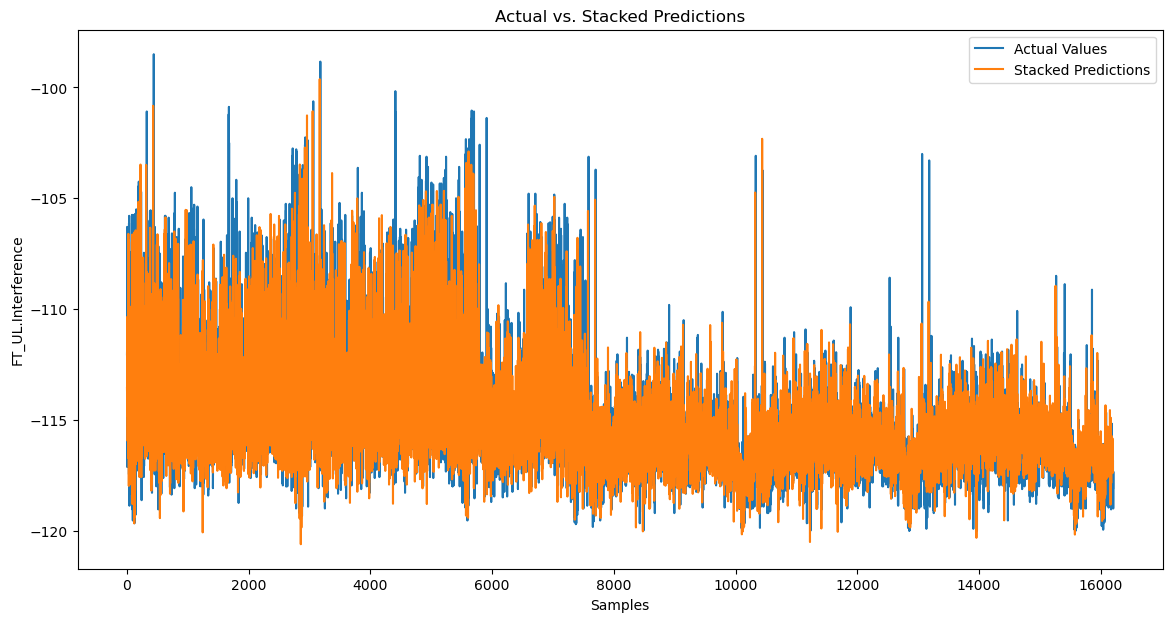

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(test_df['FT_UL.Interference'].values, label='Actual Values')
plt.plot(stacked_predictions_final, label='Stacked Predictions')
plt.title('Actual vs. Stacked Predictions')
plt.xlabel('Samples')
plt.ylabel('FT_UL.Interference')
plt.legend()
plt.show()

<span style="color: red;" > removing the interference from the exog var , it still gave me score of 0,7804 </span>

# Pickeling the models 

In [20]:
def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    return data

lags = 10
#august_arim = create_lagged_features(august_arim, 'FT_UL.Interference', lags)
august_arim = create_lagged_features(august_arim, 'Temperature (Â°C)', lags)
august_arim = create_lagged_features(august_arim, 'Humidity (%)', lags)
august_arim = create_lagged_features(august_arim, 'Wind Speed (mph)', lags)

data = august_arim.dropna()
target = 'FT_UL.Interference'
train_size = int(len(data) * 0.8)
train_df, test_df = data.iloc[:train_size], data.iloc[train_size:]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[features])
test_scaled = scaler.transform(test_df[features])

# Create input and output sequences for LSTM
def create_sequences(data, lags):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i])
        y.append(data[i, 0])  # FT_UL.Interference is the first column after scaling
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, lags)
X_test, y_test = create_sequences(test_scaled, lags)



KeyError: "None of [Index(['Temperature_Lag_1', 'Interference_Lag_1', 'Temperature_Lag_2',\n       'Interference_Lag_2', 'Temperature_Lag_3', 'Interference_Lag_3',\n       'Temperature_Lag_4', 'Interference_Lag_4', 'Temperature_Lag_5',\n       'Interference_Lag_5'],\n      dtype='object')] are in the [columns]"

In [21]:

def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    return data
lags = 10
#data = create_lagged_features(august_arim, 'FT_UL.Interference', lags)
data = create_lagged_features(data, 'Temperature (Â°C)', lags)
data = create_lagged_features(data, 'Humidity (%)', lags)
data = create_lagged_features(data, 'Wind Speed (mph)', lags)
#data = create_lagged_features(data, 'LocalCell Id', lags)
data = data.dropna()
features = (
 #   [f'FT_UL.Interference_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Wind Speed (mph)_Lag_{i}' for i in range(1, lags + 1)] 
   # [f'LocalCell Id_Lag_{i}' for i in range(1, lags + 1)]
)
target = 'FT_UL.Interference'
train_size = int(len(data) * 0.8)
train_df, test_df = data.iloc[:train_size], data.iloc[train_size:]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[features])
test_scaled = scaler.transform(test_df[features])

# Create input and output sequences for LSTM
def create_sequences(data, lags):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i])
        y.append(data[i, 0])  # FT_UL.Interference is the first column after scaling
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, lags)
X_test, y_test = create_sequences(test_scaled, lags)


In [22]:
# Function to create lagged features
def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    return data

lags = 10

# Create lagged features for 'FT_UL.Interference' and weather variables
august_arim = create_lagged_features(august_arim, 'Temperature (Â°C)', lags)
august_arim = create_lagged_features(august_arim, 'Humidity (%)', lags)
august_arim = create_lagged_features(august_arim, 'Wind Speed (mph)', lags)
august_arim = create_lagged_features(august_arim, 'LocalCell Id', lags)

# Drop rows with NaN values created by the lagging process
data = august_arim.dropna()

# Split data into training and test sets
train_size = int(len(data) * 0.8)
train_df, test_df = data.iloc[:train_size], data.iloc[train_size:]

# Exogenous variables (exclude current 'FT_UL.Interference')
exog_vars = (
    [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Wind Speed (mph)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCell Id_Lag_{i}' for i in range(1, lags + 1)] 
)

# SARIMAX model
sarimax_model_initial = SARIMAX(train_df['FT_UL.Interference'], exog=train_df[exog_vars], order=(4, 1, 4))
sarimax_model_fit_initial = sarimax_model_initial.fit(disp=False)
sarimax_predictions_initial = sarimax_model_fit_initial.forecast(len(test_df), exog=test_df[exog_vars])

# Gradient Boosting Regressor model
n_estimators = 300
learning_rate = 0.1
ewa_decay = 0.9

gbr_initial = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=8, random_state=42)
gbr_initial.fit(train_df[exog_vars], train_df['FT_UL.Interference'])

# Generate staged predictions for EWA
staged_predictions = np.array([y_pred for y_pred in gbr_initial.staged_predict(test_df[exog_vars])])
ewa_predictions = np.zeros_like(staged_predictions[0])

for i, preds in enumerate(staged_predictions):
    if i == 0:
        ewa_predictions = preds
    else:
        ewa_predictions = ewa_decay * ewa_predictions + (1 - ewa_decay) * preds

# Stacked features
stacked_features = pd.DataFrame({
    'SARIMAX': sarimax_predictions_initial,
    'GBR_EWA': ewa_predictions
})

# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, test_df['FT_UL.Interference'])

# Make predictions using the meta-model
stacked_predictions = meta_model.predict(stacked_features)

# Evaluation for initial model
mse_stacked_initial = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions)
mae_stacked_initial = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions)
r2_stacked_initial = r2_score(test_df['FT_UL.Interference'], stacked_predictions)
print(f'Initial Model - Mean Squared Error: {mse_stacked_initial}')
print(f'Initial Model - Mean Absolute Error: {mae_stacked_initial}')
print(f'Initial Model - R-squared Score: {r2_stacked_initial}')

# SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(train_df[exog_vars], train_df['FT_UL.Interference'])

# Generate SVR predictions for test set
svr_predictions = svr_model.predict(test_df[exog_vars])

# Add SVR predictions to stacked features
stacked_features['SVR'] = svr_predictions

# Train the meta-model including SVR predictions
meta_model_with_svr = LinearRegression()
meta_model_with_svr.fit(stacked_features, test_df['FT_UL.Interference'])

# Make predictions using the meta-model including SVR
stacked_predictions_with_svr = meta_model_with_svr.predict(stacked_features)

# Evaluate the model with SVR predictions
mse_stacked_with_svr = mean_squared_error(test_df['FT_UL.Interference'], stacked_predictions_with_svr)
mae_stacked_with_svr = mean_absolute_error(test_df['FT_UL.Interference'], stacked_predictions_with_svr)
r2_stacked_with_svr = r2_score(test_df['FT_UL.Interference'], stacked_predictions_with_svr)
print(f'Model with SVR - Mean Squared Error: {mse_stacked_with_svr}')
print(f'Model with SVR - Mean Absolute Error: {mae_stacked_with_svr}')
print(f'Model with SVR - R-squared Score: {r2_stacked_with_svr}')


Initial Model - Mean Squared Error: 4.442492045494631
Initial Model - Mean Absolute Error: 1.4730919966788485
Initial Model - R-squared Score: 0.3247819088844758
Model with SVR - Mean Squared Error: 4.282906768236817
Model with SVR - Mean Absolute Error: 1.4524039641659414
Model with SVR - R-squared Score: 0.34903740899042257


In [22]:

joblib.dump(sarimax_model_fit_initial, 'sarimax_model.pkl')
joblib.dump(gbr_initial, 'gbr_model.pkl')
joblib.dump(svr_model, 'svr_model.pkl')
joblib.dump(meta_model_with_svr, 'meta_model.pkl')
#joblib.dump(scaler, 'scaler.pkl')


['meta_model.pkl']

In [36]:
import pandas as pd
import joblib
import numpy as np

# Load the models
gbr_model = joblib.load('gbr_model.pkl')
svr_model = joblib.load('svr_model.pkl')
meta_model = joblib.load('meta_model.pkl')

# Example input data
input_data = {
    'Temperature (°C)': [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20],
    'Humidity (%)': [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70],
    'Wind Speed (mph)': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'LocalCell Id': [12345] * 11  # Example value, replace with actual data
}

input_df = pd.DataFrame(input_data)

# Function to create lagged features
def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    return data

lags = 10

# Create lagged features for the input data
for col in input_data.keys():
    input_df = create_lagged_features(input_df, col, lags)

# Drop rows with NaN values created by the lagging process
input_df = input_df.dropna()

# Define the required exogenous variables
exog_vars = (
    [f'Temperature (°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Wind Speed (mph)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCell Id_Lag_{i}' for i in range(1, lags + 1)]
)

# Ensure input_df has the required columns, filling missing columns with zeros
for var in exog_vars:
    if var not in input_df.columns:
        input_df[var] = 0

# Ensure the order and naming of columns in input_df matches exog_vars
input_df = input_df[exog_vars]

# Predict using the models
try:
    gbr_predictions = gbr_model.predict(input_df)
    svr_predictions = svr_model.predict(input_df)

    # Stack predictions
    stacked_features = pd.DataFrame({
        'GBR_EWA': gbr_predictions,
        'SVR': svr_predictions
    })

    # Make final prediction using the meta-model
    final_prediction = meta_model.predict(stacked_features)
    print(f'Predicted Interference: {final_prediction[0]}')

except Exception as e:
    print(f"Error occurred during prediction: {str(e)}")

# Example input values (replace with your actual data)
input_data_manual = {
    'Temperature (°C)_Lag_1': [25.5],
    'Temperature (°C)_Lag_2': [25.0],
    'Humidity (%)_Lag_1': [65.0],
    'Humidity (%)_Lag_2': [64.0],
    'Wind Speed (mph)_Lag_1': [10.0],
    'Wind Speed (mph)_Lag_2': [9.5],
    'LocalCell Id_Lag_1': [12345],
    'LocalCell Id_Lag_2': [12346]
}

# Create a DataFrame for input
input_df_manual = pd.DataFrame(input_data_manual)

# Ensure input_df_manual has the required columns, filling missing columns with zeros
for var in exog_vars:
    if var not in input_df_manual.columns:
        input_df_manual[var] = 0

# Ensure the order and naming of columns in input_df matches exog_vars
input_df_manual = input_df_manual[exog_vars]

# Predict with the stacked model
try:
    stacked_predictions_manual = meta_model.predict(input_df_manual)

    # Print the predicted interference value
    print(f'Predicted FT_UL.Interference: {stacked_predictions_manual[0]}')
except Exception as e:
    print(f"Error occurred during manual prediction: {str(e)}")


Error occurred during prediction: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Temperature (°C)_Lag_1
- Temperature (°C)_Lag_10
- Temperature (°C)_Lag_2
- Temperature (°C)_Lag_3
- Temperature (°C)_Lag_4
- ...
Feature names seen at fit time, yet now missing:
- Temperature (Â°C)_Lag_1
- Temperature (Â°C)_Lag_10
- Temperature (Â°C)_Lag_2
- Temperature (Â°C)_Lag_3
- Temperature (Â°C)_Lag_4
- ...

Error occurred during manual prediction: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Humidity (%)_Lag_1
- Humidity (%)_Lag_10
- Humidity (%)_Lag_2
- Humidity (%)_Lag_3
- Humidity (%)_Lag_4
- ...
Feature names seen at fit time, yet now missing:
- GBR_EWA
- SARIMAX
- SVR



In [39]:
# Example input data
input_data = {
    'Temperature (Â°C)_Lag_1': [25.5],
    'Temperature (Â°C)_Lag_2': [25.0],
    'Humidity (%)_Lag_1': [65.0],
    'Humidity (%)_Lag_2': [64.0],
    'Wind Speed (mph)_Lag_1': [10.0],
    'Wind Speed (mph)_Lag_2': [9.5],
    'LocalCell Id_Lag_1': [12345],
    'LocalCell Id_Lag_2': [12346]
}

# Create DataFrame for input
input_df = pd.DataFrame(input_data)

# Ensure correct column order
exog_vars = [
    'Temperature (Â°C)_Lag_1', 'Temperature (Â°C)_Lag_2',
    'Humidity (%)_Lag_1', 'Humidity (%)_Lag_2',
    'Wind Speed (mph)_Lag_1', 'Wind Speed (mph)_Lag_2',
    'LocalCell Id_Lag_1', 'LocalCell Id_Lag_2'
]

# Reorder columns to match exog_vars
input_df = input_df[exog_vars]

# Check columns before prediction
print("Columns of input_df:")
print(input_df.columns)

# Predict with the stacked model
try:
    stacked_predictions_manual = meta_model_with_svr.predict(input_df)
    print(f'Predicted FT_UL.Interference: {stacked_predictions_manual[0]}')
except Exception as e:
    print(f"Error occurred during prediction: {str(e)}")


Columns of input_df:
Index(['Temperature (Â°C)_Lag_1', 'Temperature (Â°C)_Lag_2',
       'Humidity (%)_Lag_1', 'Humidity (%)_Lag_2', 'Wind Speed (mph)_Lag_1',
       'Wind Speed (mph)_Lag_2', 'LocalCell Id_Lag_1', 'LocalCell Id_Lag_2'],
      dtype='object')
Error occurred during prediction: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Humidity (%)_Lag_1
- Humidity (%)_Lag_2
- LocalCell Id_Lag_1
- LocalCell Id_Lag_2
- Temperature (Â°C)_Lag_1
- ...
Feature names seen at fit time, yet now missing:
- GBR_EWA
- SARIMAX
- SVR



# <span style="color: red;" >Temporal Fusion Transformer</span>

In [39]:

# Assuming your data is in train_df and test_df DataFrames
def create_lagged_features(data, column, lags):
    for lag in range(1, lags + 1):
        data[f'{column}_Lag_{lag}'] = data[column].shift(lag)
    return data
lags = 10
august_arim = create_lagged_features(august_arim, 'FT_UL.Interference', lags)
august_arim = create_lagged_features(august_arim, 'Temperature (Â°C)', lags)
august_arim = create_lagged_features(august_arim, 'Humidity (%)', lags)
august_arim = create_lagged_features(august_arim, 'Wind Speed (mph)', lags)
august_arim = create_lagged_features(august_arim, 'LocalCell Id', lags)
august_arim = august_arim.dropna()
features = (
    [f'FT_UL.Interference_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Temperature (Â°C)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Humidity (%)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'Wind Speed (mph)_Lag_{i}' for i in range(1, lags + 1)] +
    [f'LocalCell Id_Lag_{i}' for i in range(1, lags + 1)]
)

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[exog_vars + ['FT_UL.Interference']])
test_scaled = scaler.transform(test_df[exog_vars + ['FT_UL.Interference']])

# Prepare data for TFT
X_train = train_scaled[:, :-1]  # All columns except the target
y_train = train_scaled[:, -1]   # The target column

X_test = test_scaled[:, :-1]    # All columns except the target
y_test = test_scaled[:, -1]     # The target column


In [40]:

# Define the dataset class
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).unsqueeze(1)  # Add sequence dimension
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define the TemporalFusionTransformer model
class TemporalFusionTransformer(pl.LightningModule):
    def __init__(self, input_size, output_size, hidden_size=64, num_layers=1, dropout=0.2):
        super(TemporalFusionTransformer, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.dropout(lstm_out[:, -1, :])  # Assuming using the last LSTM output
        out = self.linear(out)
        return out

    def training_step(self, batch, batch_idx):
        x, y = batch
        output = self(x)
        loss = nn.MSELoss()(output, y)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        output = self(x)
        loss = nn.MSELoss()(output, y)
        self.log('val_loss', loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)


In [45]:
input_size = X_train.shape[1]
output_size = 1

model = TemporalFusionTransformer(input_size, output_size)

# Initialize PyTorch Lightning Trainer
trainer = pl.Trainer(
    max_epochs=30,
    accelerator='gpu' if torch.cuda.is_available() else 'cpu',
    devices=1
)

# Train the model
trainer.fit(model, train_loader, val_loader)

# Create a separate scaler for the target variable
target_scaler = MinMaxScaler()
target_scaler.fit(train_df[['FT_UL.Interference']])

# Make predictions
predictions = []
true_values = []
for batch in val_loader:
    x, y = batch
    with torch.no_grad():
        pred = model(x)
    predictions.append(pred.numpy())
    true_values.append(y.numpy())

predictions = np.concatenate(predictions)
true_values = np.concatenate(true_values)

# Scale back the predictions and true values using the target scaler
predictions = target_scaler.inverse_transform(predictions.reshape(-1, 1))
true_values = target_scaler.inverse_transform(true_values.reshape(-1, 1))

# Print or use the forecasted values
print(predictions)

# Calculate accuracy metrics
mse = mean_squared_error(true_values, predictions)
mae = mean_absolute_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | lstm    | LSTM    | 23.3 K | train
1 | dropout | Dropout | 0      | train
2 | linear  | Linear  | 65     | train
--------------------------------------------
23.4 K    Trainable params
0         Non-trainable params
23.4 K    Total params
0.093     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


[[-115.07154]
 [-115.06756]
 [-115.06452]
 ...
 [-115.09371]
 [-115.09319]
 [-115.1002 ]]
Mean Squared Error: 6.53001594543457
Mean Absolute Error: 1.7854472398757935
R-squared: 0.007497310638427734


# Deploy with modelbit

In [23]:
import modelbit
mb = modelbit.login()

In [26]:
mb.deploy(stacked_predictions_final)

ModelbitError: Failed to deploy.

In [23]:
from sklearn.datasets import load_iris
import joblib
joblib.dump(stacked_predictions_with_svr, 'modelsvr.pkl')


['modelsvr.pkl']

In [ ]:
joblib.dump(sarimax_model_fit, 'sarimax_model.pkl')
joblib.dump(gbr_model, 'gbr_model.pkl')
joblib.dump(svr_model, 'svr_model.pkl')
joblib.dump(meta_model, 'meta_model.pkl')
